# Loading Dataset

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import keras_tuner as kt
import matplotlib.pyplot as plt

In [3]:
def load_dataset(path):
    return pd.read_csv(path)

In [4]:
file_path='./NULBdata.csv'
df_stock = load_dataset(file_path)

In [8]:
df_stock

S.N.        Date Open   High    Low    Ltp  % Change        Qty  \
0        1  15/05/2024  675  682.9  660.1  660.1     -1.62  15,761.00   
1        2  14/05/2024  655  674.9    655    671      3.07  18,718.00   
2        3  13/05/2024  650    658    645    651      0.11   5,463.00   
3        4  12/05/2024  670    670  650.3  650.3     -2.94   6,884.00   
4        5  09/05/2024  683  689.6  662.6    670     -0.89  14,540.00   
...    ...         ...  ...    ...    ...    ...       ...        ...   
2471  2472  18/05/2011  230    230    230    230      0.00         22   
2472  2473  16/05/2011  229    230    230    230      0.00         20   
2473  2474  15/05/2011  225    229    229    229      0.00         57   
2474  2475  12/05/2011  225    229    225    225      0.00         59   
2475  2476  06/04/2011  225    225    225    225      0.00         64   

            Turnover  
0     1,06,01,118.70  
1     1,25,18,869.30  
2       35,48,046.70  
3       45,11,826.40  
4       97,68,167.80  
...              ...  
2471        5,060.00  
2472        4,600.00  
2473       13,053.00  
2474       13,427.00  
2475       14,400.00  

[2476 rows x 9 columns]

In [10]:
print("\nBasic statistics:")
print(df_stock.describe())


Basic statistics:
              S.N.     % Change
count  2476.000000  2476.000000
mean   1238.500000     0.020586
std     714.903956     1.666216
min       1.000000   -20.660000
25%     619.750000    -0.342500
50%    1238.500000     0.000000
75%    1857.250000     0.000000
max    2476.000000    10.000000


In [12]:
# Check for missing values
print("\nMissing values:")
print(df_stock.isnull().sum())


Missing values:
S.N.        0
Date        0
Open        0
High        0
Low         0
Ltp         0
% Change    0
Qty         0
Turnover    0
dtype: int64


In [22]:
df_stock=df_stock.rename(columns={'% Change':'Change'})

In [24]:
features = ['Date','Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']
df_stock = df_stock[features]

In [26]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    day, month, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [28]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')


In [30]:
df_input = df_stock[['Date','Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']]

In [32]:
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data, min_val, max_val

In [34]:
columns_to_scale = ['Date','Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover']
scaled_df = df_input.copy()

In [36]:
df_stock['Open'] = df_stock['Open'].str.replace(',', '').astype(float)
df_stock['High'] = df_stock['High'].str.replace(',', '').astype(float)
df_stock['Low'] = df_stock['Low'].str.replace(',', '').astype(float)
df_stock['Ltp'] = df_stock['Ltp'].str.replace(',', '').astype(float)
df_stock['Qty'] = df_stock['Qty'].str.replace(',', '').astype(float)
df_stock['Turnover'] = df_stock['Turnover'].str.replace(',', '').astype(float)
df_stock['Change'] = df_stock['Change'].astype(float)
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')

# Extract additional temporal features
df_stock['day_of_week'] = df_stock['Date'].dt.dayofweek
df_stock['month'] = df_stock['Date'].dt.month

In [38]:
# Convert all necessary columns to strings first
df_stock['Open'] = df_stock['Open'].astype(str)
df_stock['High'] = df_stock['High'].astype(str)
df_stock['Low'] = df_stock['Low'].astype(str)
df_stock['Ltp'] = df_stock['Ltp'].astype(str)
df_stock['Qty'] = df_stock['Qty'].astype(str)
df_stock['Turnover'] = df_stock['Turnover'].astype(str)

# Remove commas from numeric columns and convert to float
df_stock['Open'] = df_stock['Open'].str.replace(',', '').astype(float)
df_stock['High'] = df_stock['High'].str.replace(',', '').astype(float)
df_stock['Low'] = df_stock['Low'].str.replace(',', '').astype(float)
df_stock['Ltp'] = df_stock['Ltp'].str.replace(',', '').astype(float)
df_stock['Qty'] = df_stock['Qty'].str.replace(',', '').astype(float)
df_stock['Turnover'] = df_stock['Turnover'].str.replace(',', '').astype(float)
df_stock['Change'] = df_stock['Change'].astype(float)



In [40]:
features = ['Open', 'High', 'Low', 'Ltp', 'Change', 'Qty', 'Turnover', 'day_of_week', 'month']
df_stock = df_stock[features]

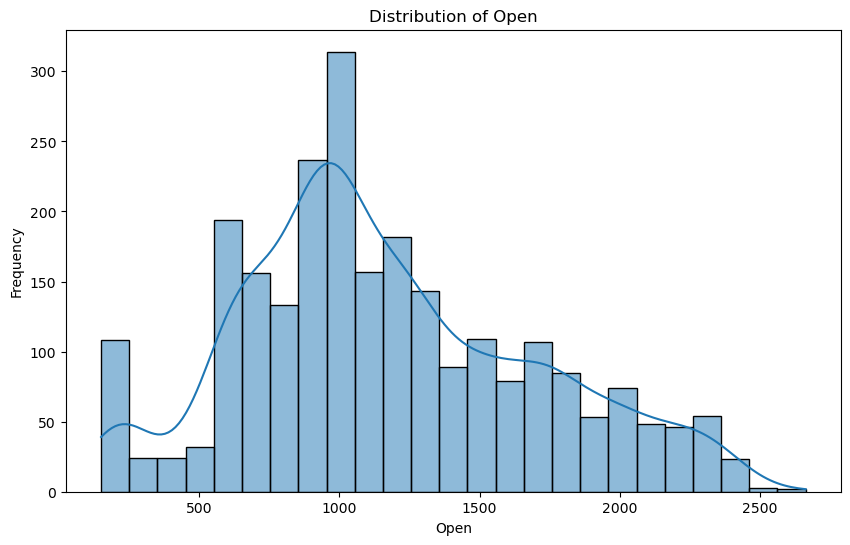

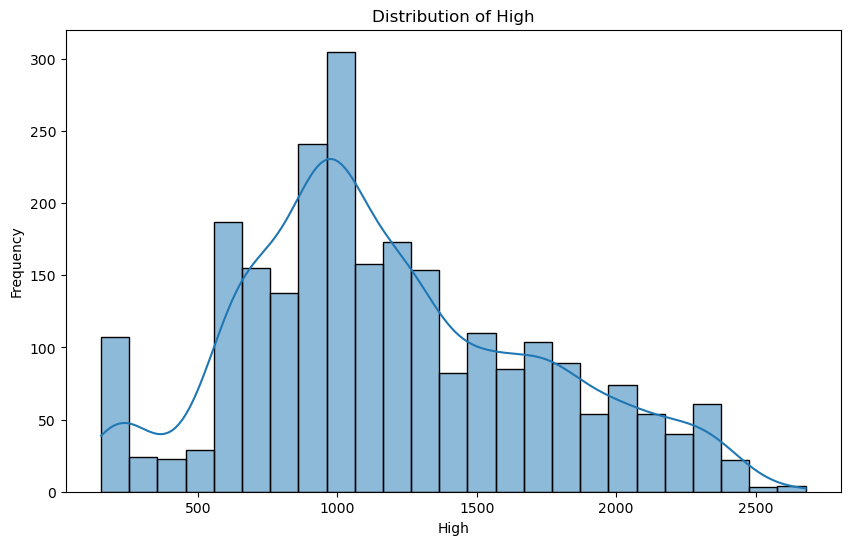

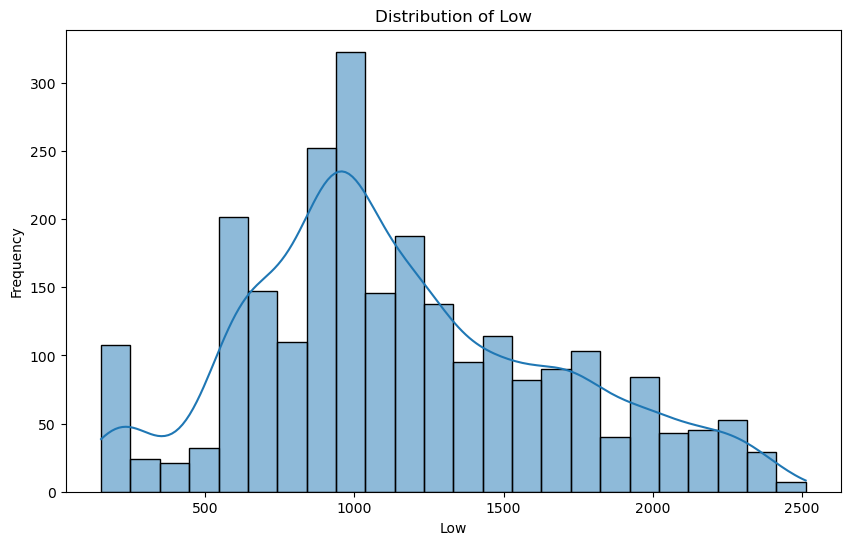

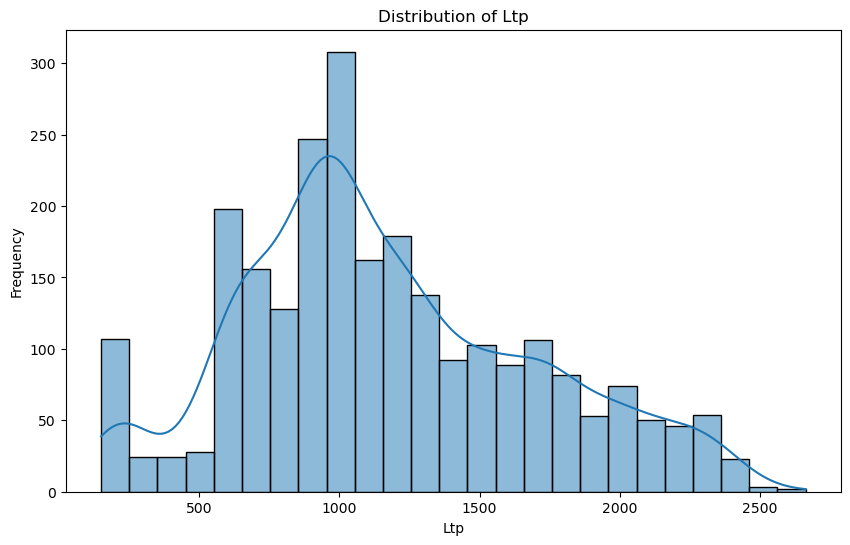

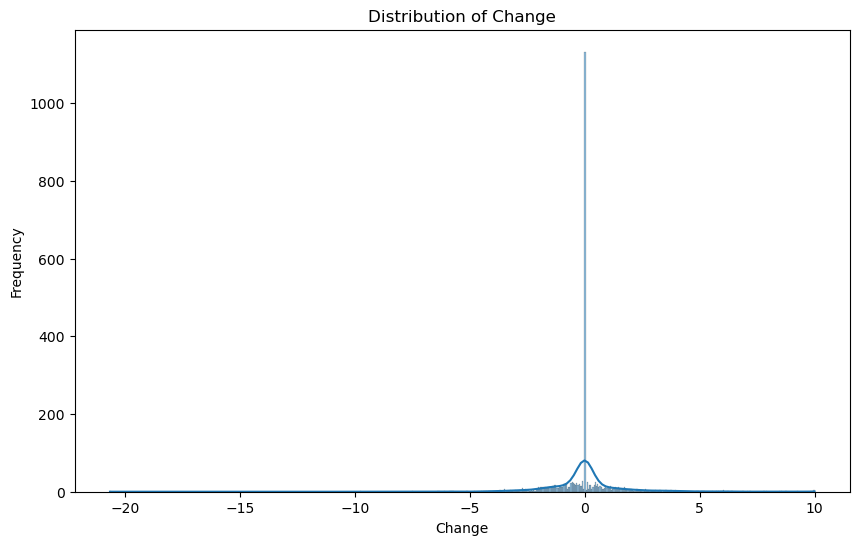

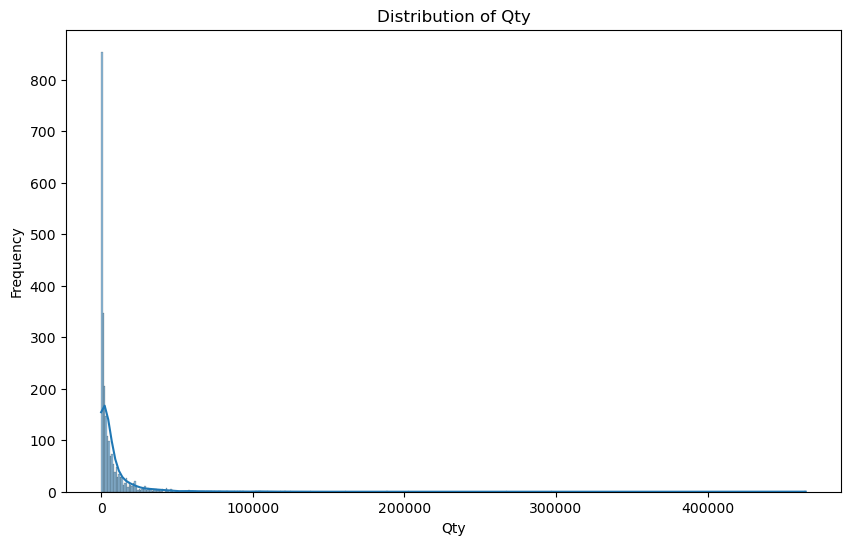

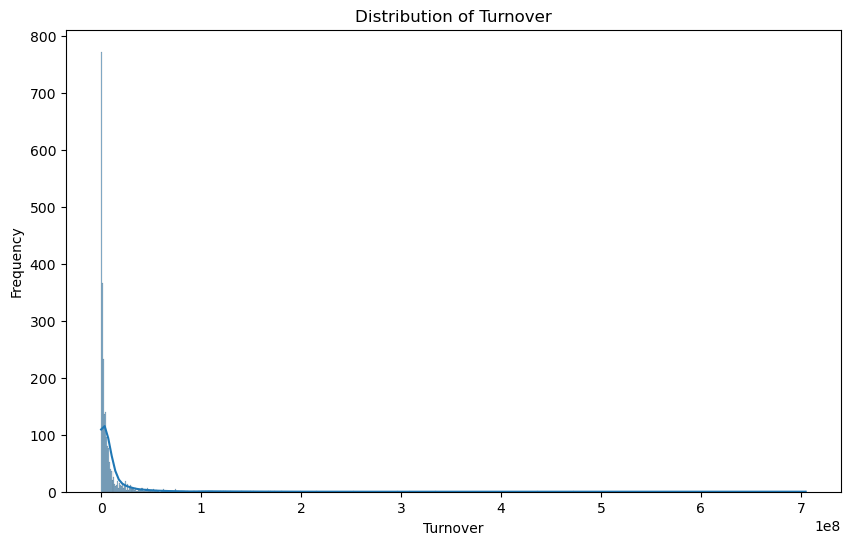

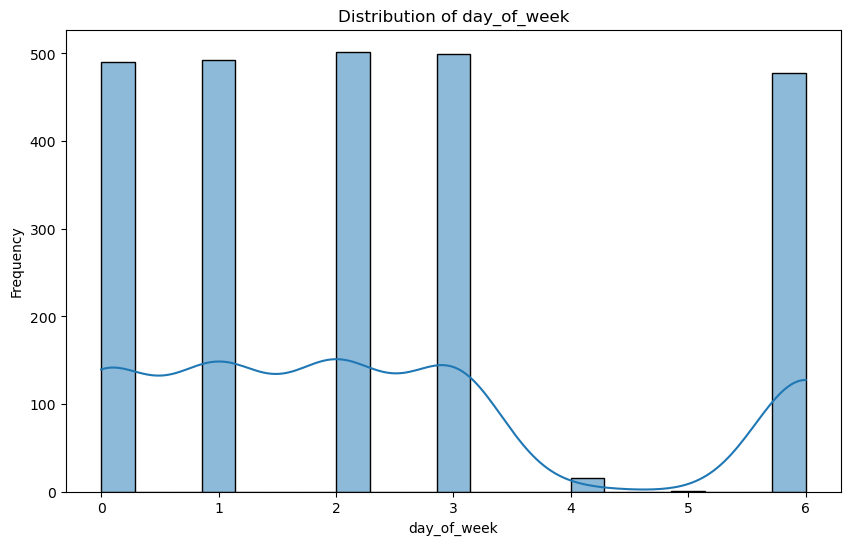

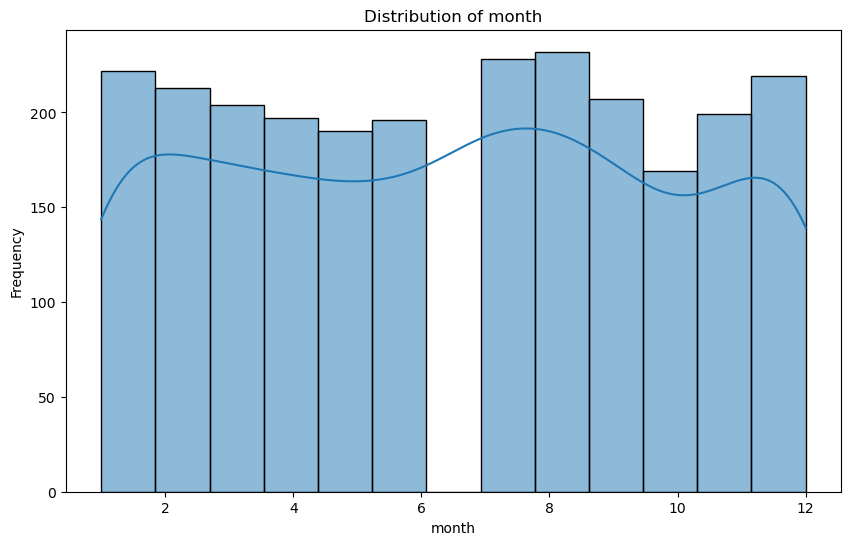

In [42]:
import seaborn as sns
# Visualize the data distribution
def plot_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in df_stock.columns:
    plot_distribution(df_stock, column)

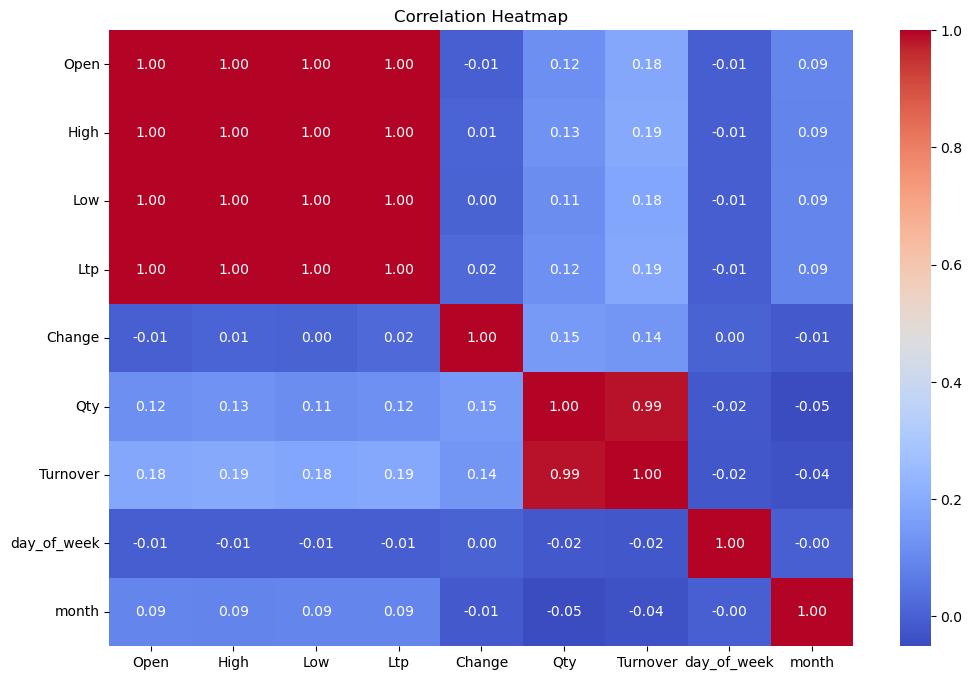

In [44]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_stock.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


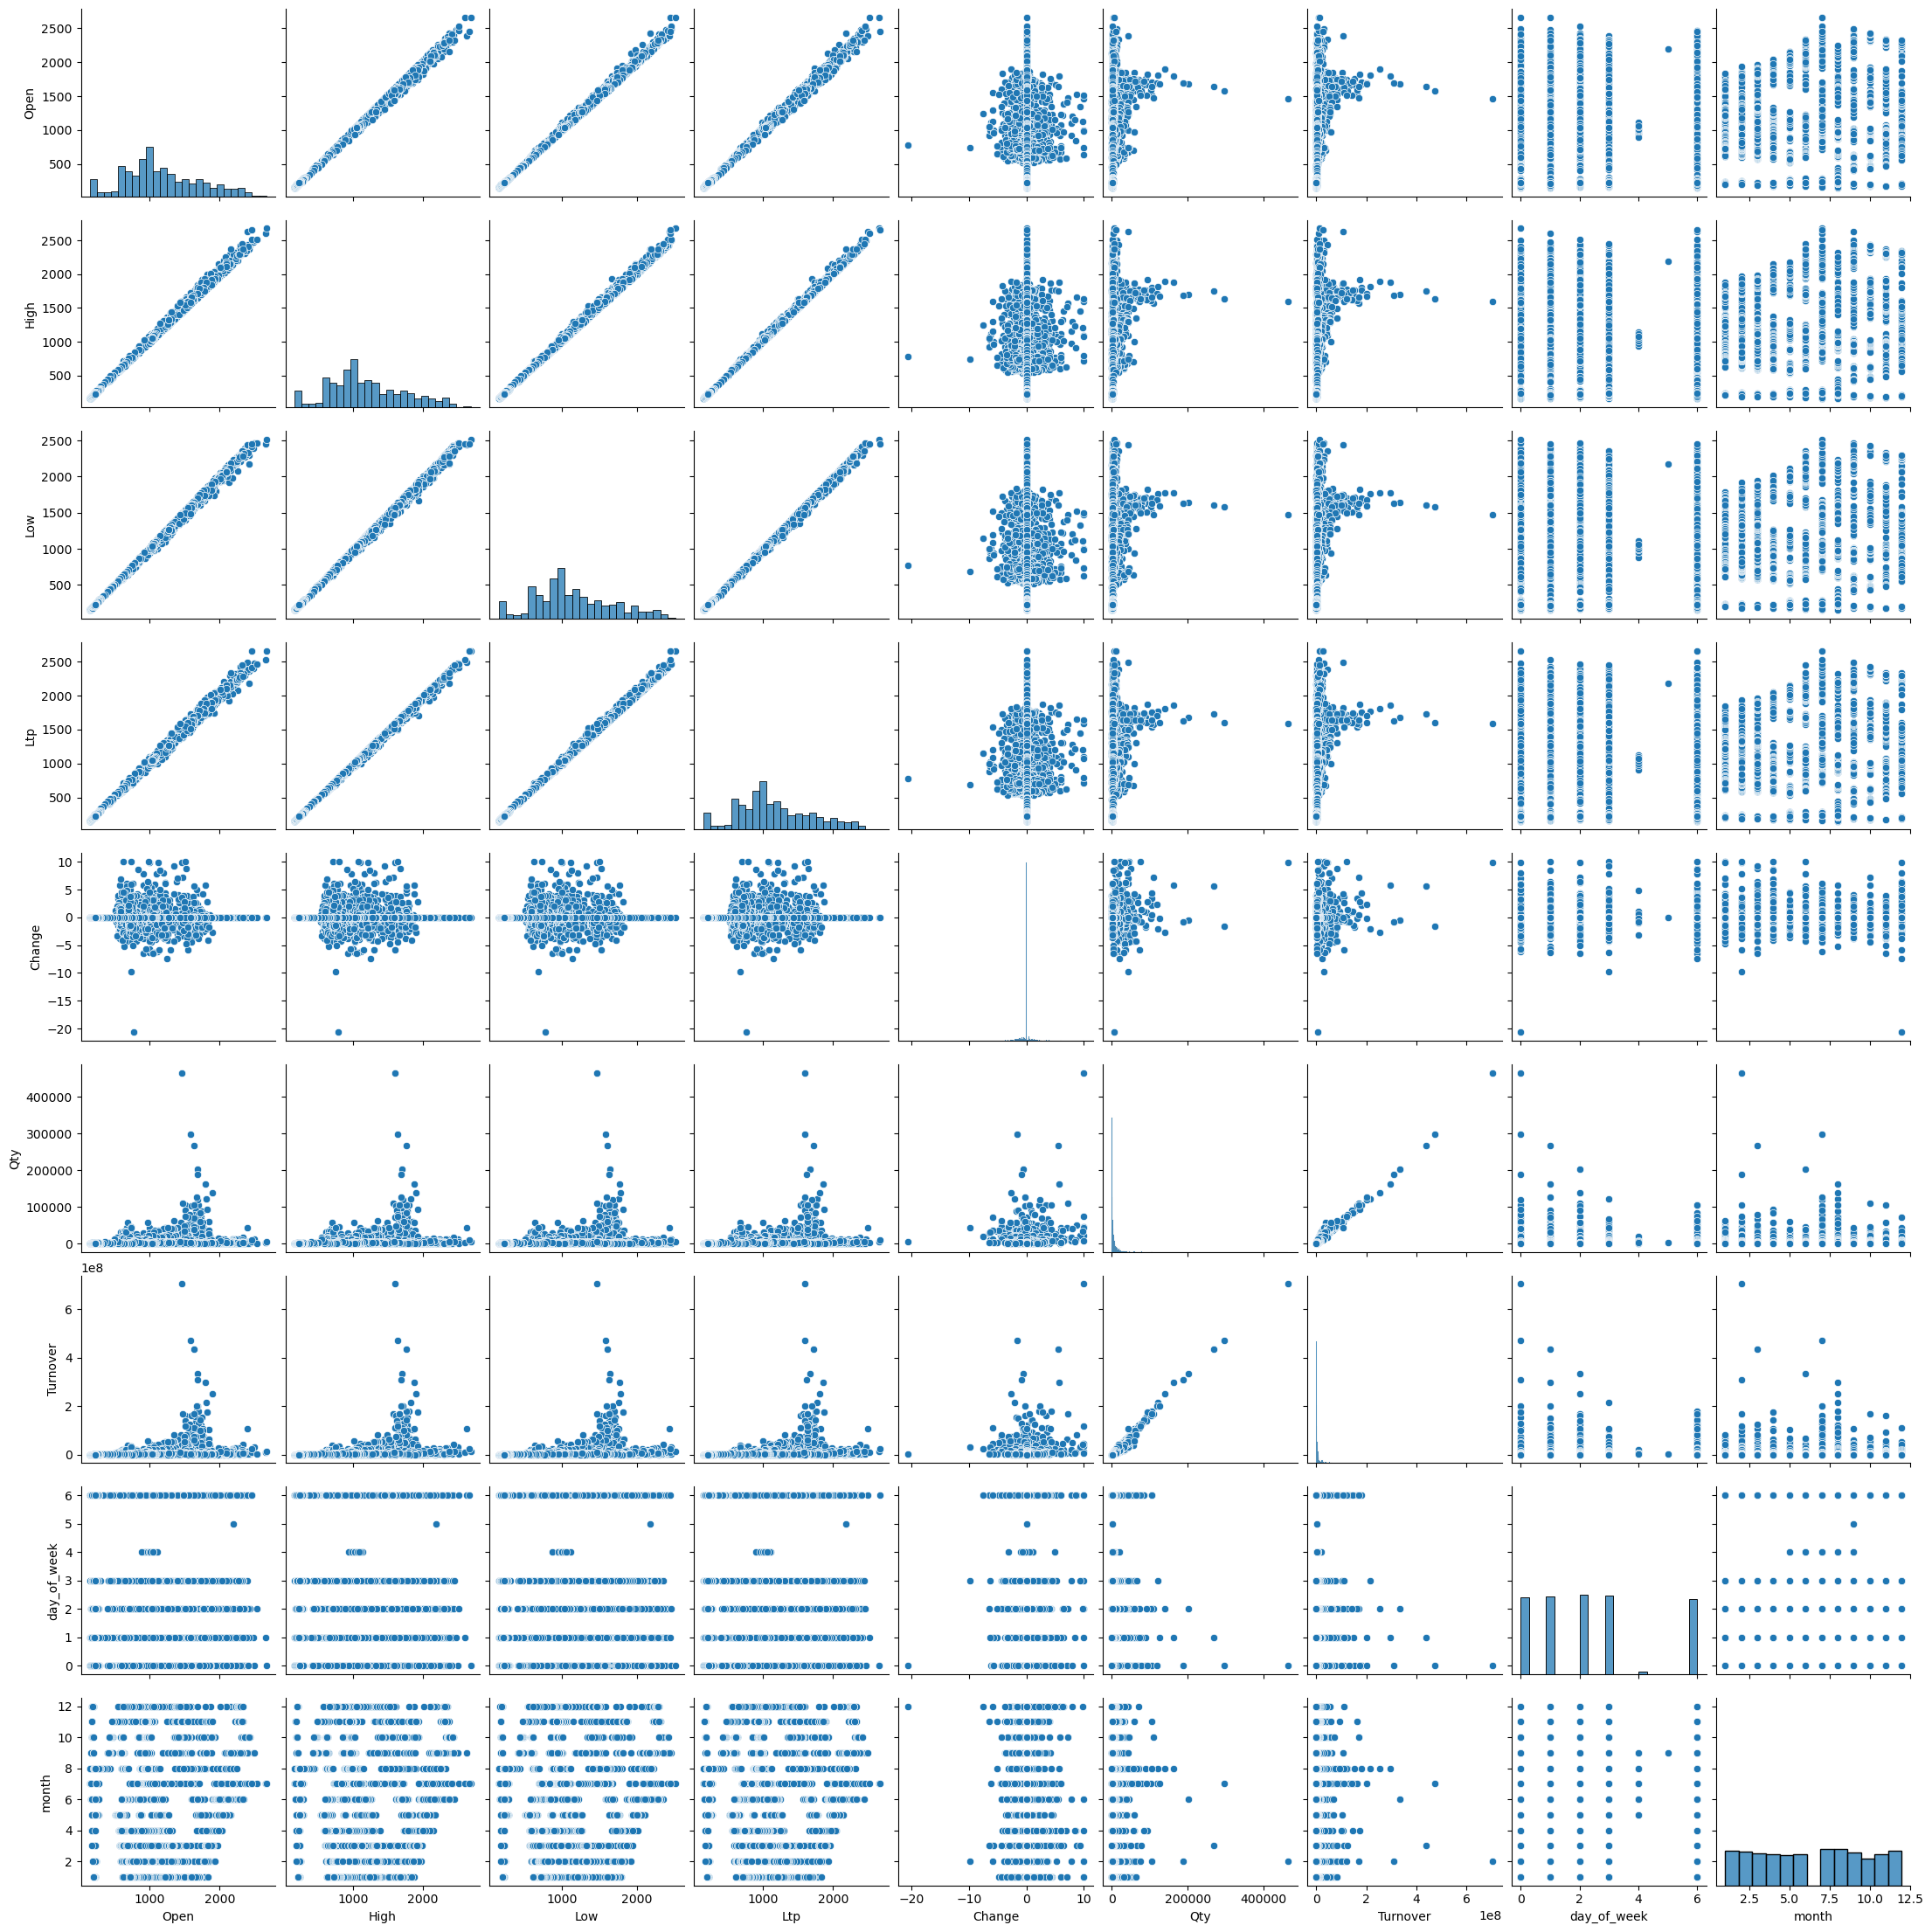

In [46]:
# Pairplot for the dataframe
sns.pairplot(df_stock)
plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler
import joblib
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_stock), columns=features)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [50]:
# def df_to_X_y(df, window_size=2):
#     df_as_np = df.to_numpy()
#     X = []
#     y = []
#     for i in range(len(df_as_np)-window_size):
#         row = [r for r in df_as_np[i:i+window_size]]
#         X.append(row)
#         label = df_as_np[i+window_size][4]  # Predicting 'Ltp'
#         y.append(label)
#     return np.array(X), np.array(y)

def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        y.append(df_as_np[i+window_size][3])  # Predicting 'Ltp'
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 6
X, y = df_to_X_y(df_scaled, WINDOW_SIZE)

In [54]:

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers



In [75]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
def variable_selection_network(inputs):
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(1, activation='sigmoid')(x)
    return x

In [81]:
def gated_residual_network(inputs, units):
    x = layers.Dense(units, activation='relu')(inputs)
    x = layers.Dense(inputs.shape[-1])(x)
    gate = layers.Dense(inputs.shape[-1], activation='sigmoid')(inputs)
    return x * gate + inputs

In [83]:

def build_tft_model(hp):
    inputs = keras.Input(shape=X.shape[1:])
    x = inputs

    for i in range(hp.Int('num_transformer_blocks', min_value=2, max_value=8, step=2)):
        x = transformer_encoder(x, hp.Int('head_size', min_value=8, max_value=256, step=32), hp.Int('num_heads', min_value=2, max_value=16), hp.Int('ff_dim', min_value=4, max_value=64), hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.6))

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

    for i in range(hp.Int('num_mlp_layers', min_value=1, max_value=3)):
        x = layers.Dense(hp.Int(f'mlp_units_{i}', min_value=32, max_value=256, step=32))(x)
        x = layers.Activation('relu')(x)
        x = layers.Dropout(hp.Float(f'mlp_dropout_{i}', min_value=0.1, max_value=0.6))(x)

    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)

    optimizer = hp.Choice('optimizer', values=['adam', 'adamax'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = Adamax(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)

    model.compile(optimizer=opt, loss=MeanSquaredError(), metrics=['mae', RootMeanSquaredError()])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )
    return model

In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras import layers
from tensorflow import keras

In [89]:
# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_tft_model,
    objective='val_loss',
    max_trials=30,
    directory='./tft_tuning',
    project_name='tft_project'
)   

In [91]:
# Nested Cross-Validation
import numpy as np
from sklearn.model_selection import KFold
import keras_tuner as kt

best_model_hyperparameters = None
best_model_mae = float('inf')
worst_model_hyperparameters = None
worst_model_mae = float('-inf')

In [93]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the tuner
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Trial 30 Complete [00h 02m 06s]
val_loss: 0.003357706358656287

Best val_loss So Far: 0.0004469375417102128
Total elapsed time: 03h 00m 33s


In [94]:
nested_scores = []
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [95]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]

# Build the model with the optimal hyperparameters
model = build_tft_model(best_hps)



In [97]:
from tensorflow.keras.optimizers import Adam, Adamax

In [98]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
# Define a function to plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [100]:
# Define a function to plot training and validation MAE
def plot_mae(history):
    plt.figure(figsize=(10, 6))
    if 'mean_absolute_error' in history.history and 'val_mean_absolute_error' in history.history:
        plt.plot(history.history['mean_absolute_error'], label='Training MAE')
        plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
        plt.title('Training and Validation MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()
        plt.show()
    else:
        print("MAE metric not found in history.")


In [128]:
# Define a function to plot training and validation MSE
def plot_mse(history):
    plt.figure(figsize=(10, 6))
    if 'mean_squared_error' in history.history and 'val_mean_squared_error' in history.history:
        plt.plot(history.history['mean_squared_error'], label='Training MSE')
        plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
        plt.title('Training and Validation MSE')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
    else:
        print("MSE metric not found in history.")

Reloading Tuner from ./keras_tuner_random_dir_fold_tf_0_0/hyperparameter_random_tuning_fold_tf_0_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x5637c7750>


Epoch 1/5
31/31 [==============================] - 10s 91ms/step - loss: 0.0948 - mean_absolute_error: 0.2364 - mean_squared_error: 0.0948 - val_loss: 0.0286 - val_mean_absolute_error: 0.1469 - val_mean_squared_error: 0.0286
Epoch 2/5
31/31 [==============================] - 2s 58ms/step - loss: 0.0306 - mean_absolute_error: 0.1358 - mean_squared_error: 0.0306 - val_loss: 0.0154 - val_mean_absolute_error: 0.1034 - val_mean_squared_error: 0.0154
Epoch 3/5
31/31 [==============================] - 2s 56ms/step - loss: 0.0233 - mean_absolute_error: 0.1178 - mean_squared_error: 0.0233 - val_loss: 0.0131 - val_mean_absolute_error: 0.0957 - val_mean_squared_error: 0.0131
Epoch 4/5
31/31 [==============================] - 2s 71ms/step - loss: 0.0204 - mean_absolute_error: 0.1118 - mean_squared_error: 0.0204 - val_loss: 0.0150 - val_mean_absolute_error: 0.0939 - val_mean_squared_error: 0.0150
Epoch 5/5
31/31 [==============================] - 2s 67ms/step - loss: 0.0146 - mean_absolute_error: 0

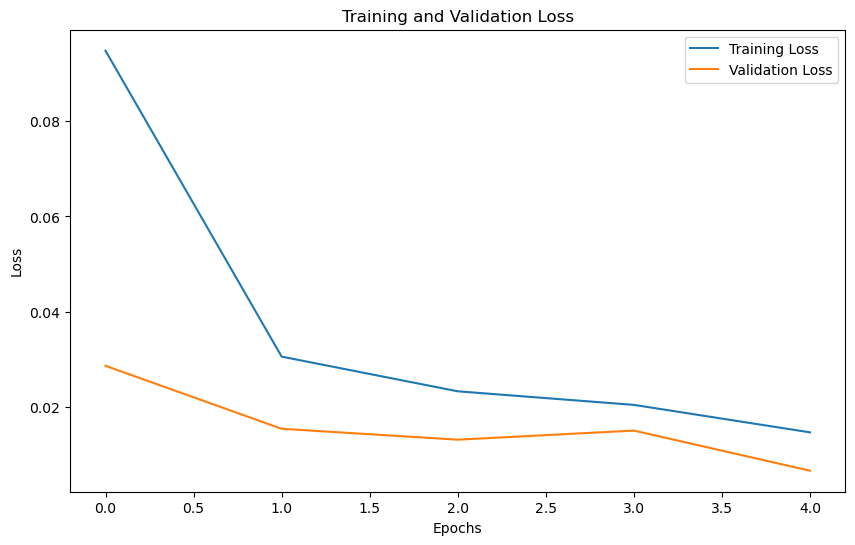

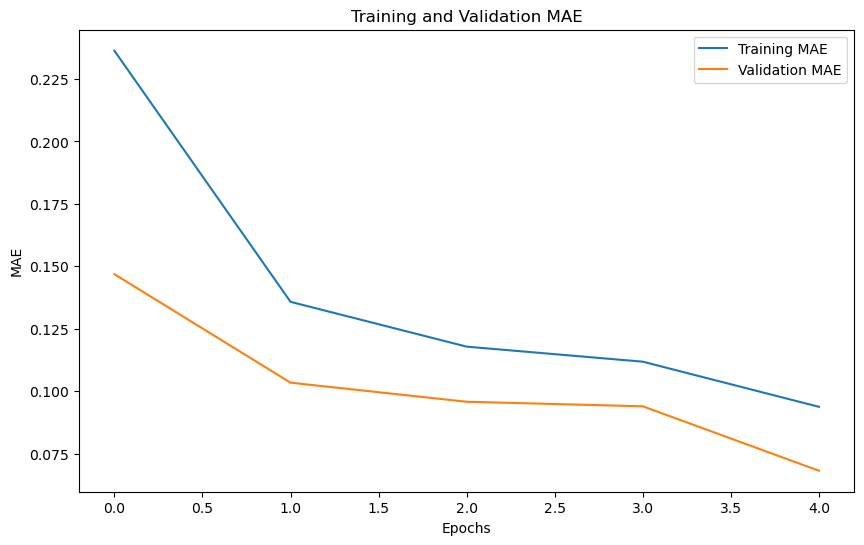

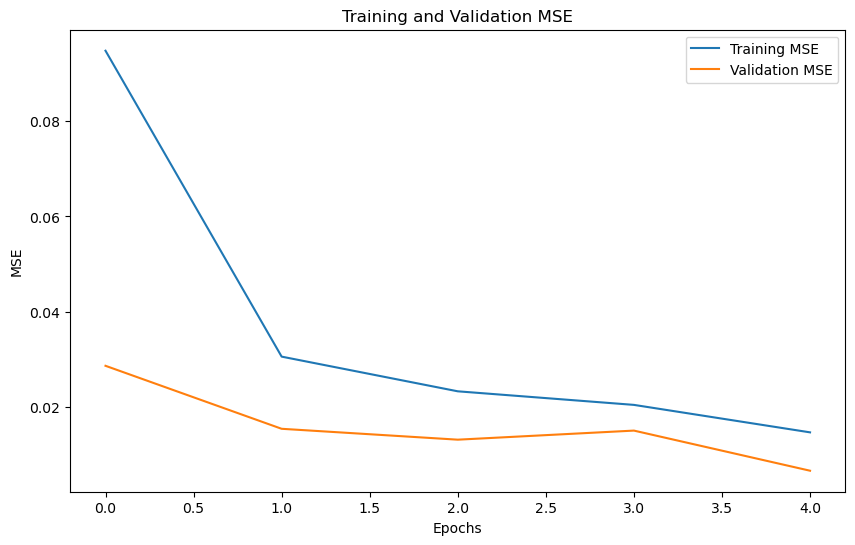

31/31 [==============================] - 1s 10ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_0_1/hyperparameter_random_tuning_fold_tf_0_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x568864710>


Epoch 1/5
31/31 [==============================] - 10s 96ms/step - loss: 0.1980 - mean_absolute_error: 0.3805 - mean_squared_error: 0.1980 - val_loss: 0.0371 - val_mean_absolute_error: 0.1438 - val_mean_squared_error: 0.0371
Epoch 2/5
31/31 [==============================] - 2s 74ms/step - loss: 0.0460 - mean_absolute_error: 0.1596 - mean_squared_error: 0.0460 - val_loss: 0.0048 - val_mean_absolute_error: 0.0527 - val_mean_squared_error: 0.0048
Epoch 3/5
31/31 [==============================] - 2s 68ms/step - loss: 0.0252 - mean_absolute_error: 0.1188 - mean_squared_error: 0.0252 - val_loss: 0.0125 - val_mean_absolute_error: 0.1040 - val_mean_squared_error: 0.0125
Epoch 4/5
31/31 [==============================] - 2s 71ms/step - loss: 0.0224 - mean_absolute_error: 0.1152 - mean_squared_error: 0.0224 - val_loss: 0.0043 - val_mean_absolute_error: 0.0509 - val_mean_squared_error: 0.0043
Epoch 5/5
31/31 [==============================] - 3s 85ms/step - loss: 0.0179 - mean_absolute_error: 0

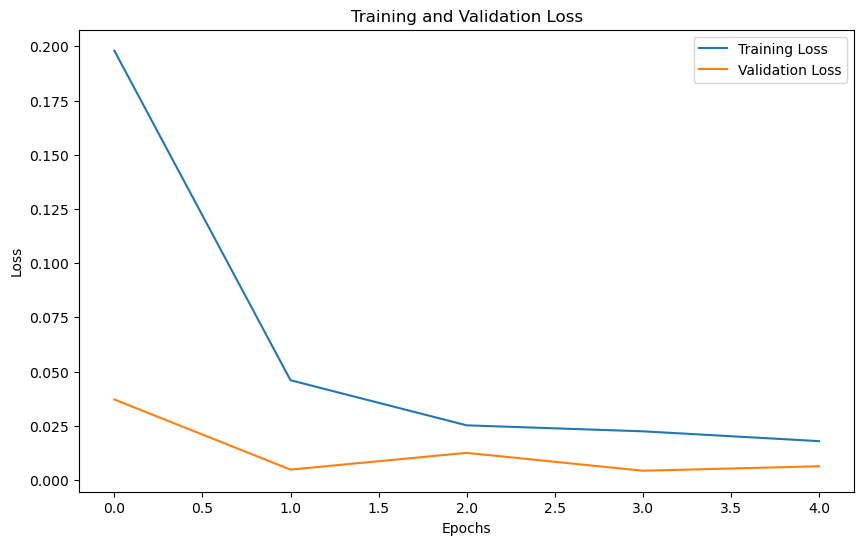

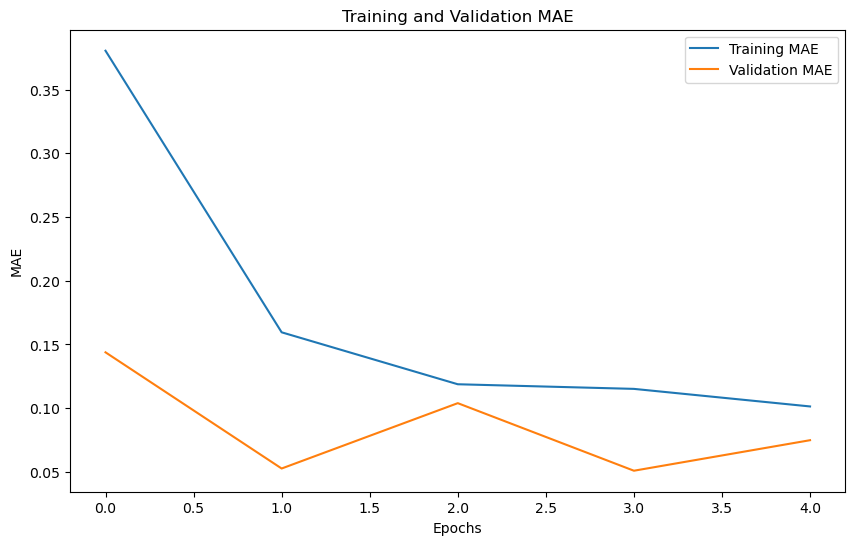

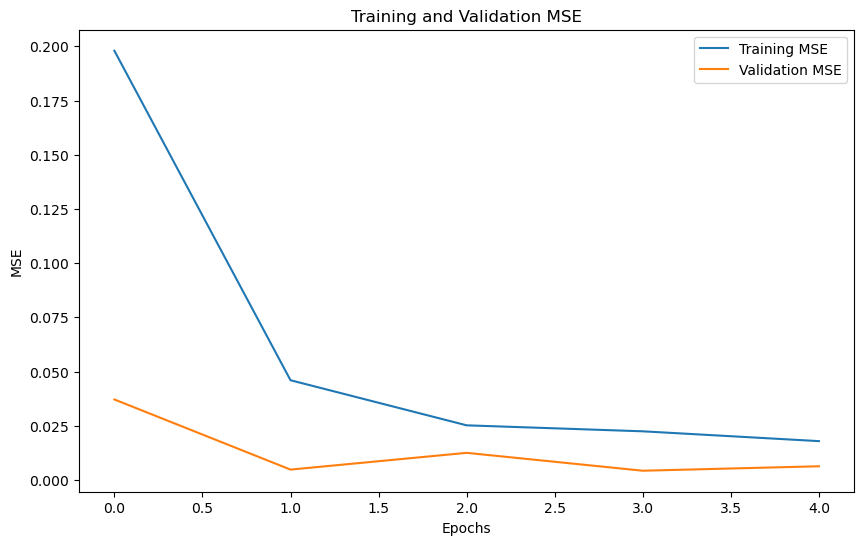

16/16 [==============================] - 0s 5ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_1_0/hyperparameter_random_tuning_fold_tf_1_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x56b1d78d0>


Epoch 1/5
31/31 [==============================] - 3s 22ms/step - loss: 0.0390 - mean_absolute_error: 0.1493 - mean_squared_error: 0.0390 - val_loss: 0.0023 - val_mean_absolute_error: 0.0388 - val_mean_squared_error: 0.0023
Epoch 2/5
31/31 [==============================] - 1s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0959 - mean_squared_error: 0.0167 - val_loss: 0.0097 - val_mean_absolute_error: 0.0770 - val_mean_squared_error: 0.0097
Epoch 3/5
31/31 [==============================] - 1s 24ms/step - loss: 0.0088 - mean_absolute_error: 0.0701 - mean_squared_error: 0.0088 - val_loss: 0.0032 - val_mean_absolute_error: 0.0409 - val_mean_squared_error: 0.0032
Epoch 4/5
31/31 [==============================] - 1s 21ms/step - loss: 0.0063 - mean_absolute_error: 0.0583 - mean_squared_error: 0.0063 - val_loss: 0.0077 - val_mean_absolute_error: 0.0634 - val_mean_squared_error: 0.0077
Epoch 5/5
31/31 [==============================] - 1s 22ms/step - loss: 0.0063 - mean_absolute_error: 0.

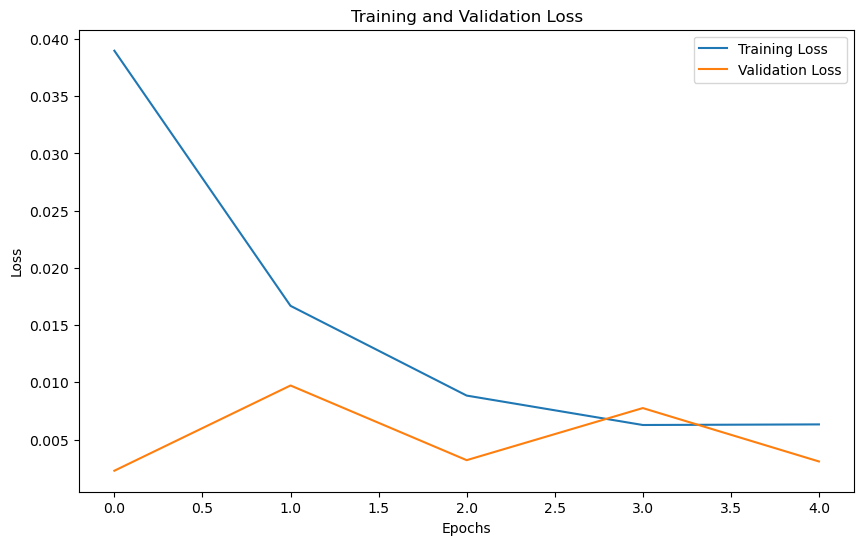

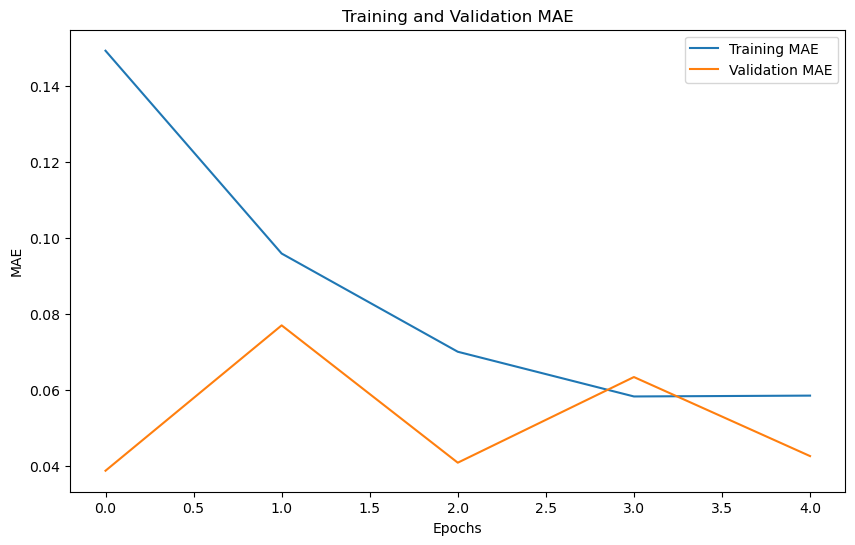

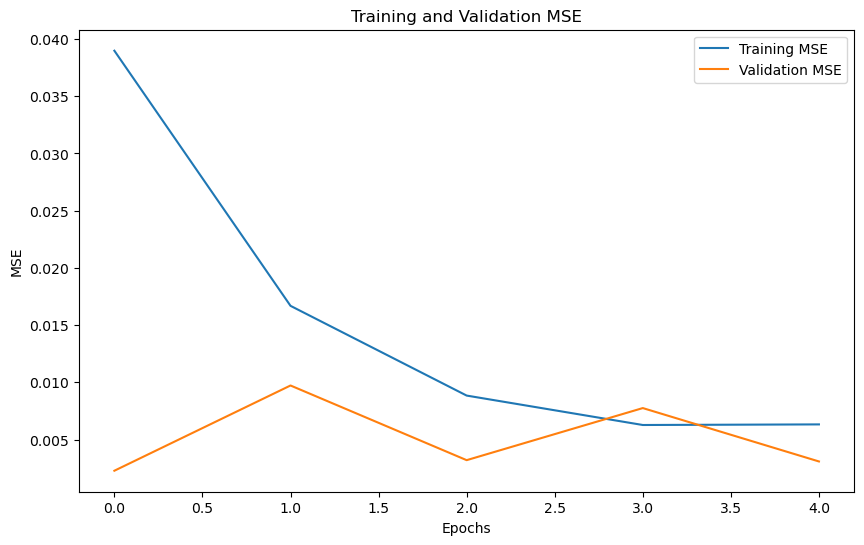

31/31 [==============================] - 0s 5ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_1_1/hyperparameter_random_tuning_fold_tf_1_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x56e1e0c50>


Epoch 1/5
31/31 [==============================] - 5s 31ms/step - loss: 0.0798 - mean_absolute_error: 0.2152 - mean_squared_error: 0.0798 - val_loss: 0.0318 - val_mean_absolute_error: 0.1558 - val_mean_squared_error: 0.0318
Epoch 2/5
31/31 [==============================] - 0s 10ms/step - loss: 0.0302 - mean_absolute_error: 0.1342 - mean_squared_error: 0.0302 - val_loss: 0.0215 - val_mean_absolute_error: 0.1289 - val_mean_squared_error: 0.0215
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.1099 - mean_squared_error: 0.0206 - val_loss: 0.0038 - val_mean_absolute_error: 0.0475 - val_mean_squared_error: 0.0038
Epoch 4/5
31/31 [==============================] - 1s 22ms/step - loss: 0.0171 - mean_absolute_error: 0.1003 - mean_squared_error: 0.0171 - val_loss: 0.0049 - val_mean_absolute_error: 0.0573 - val_mean_squared_error: 0.0049
Epoch 5/5
31/31 [==============================] - 1s 42ms/step - loss: 0.0155 - mean_absolute_error: 0.

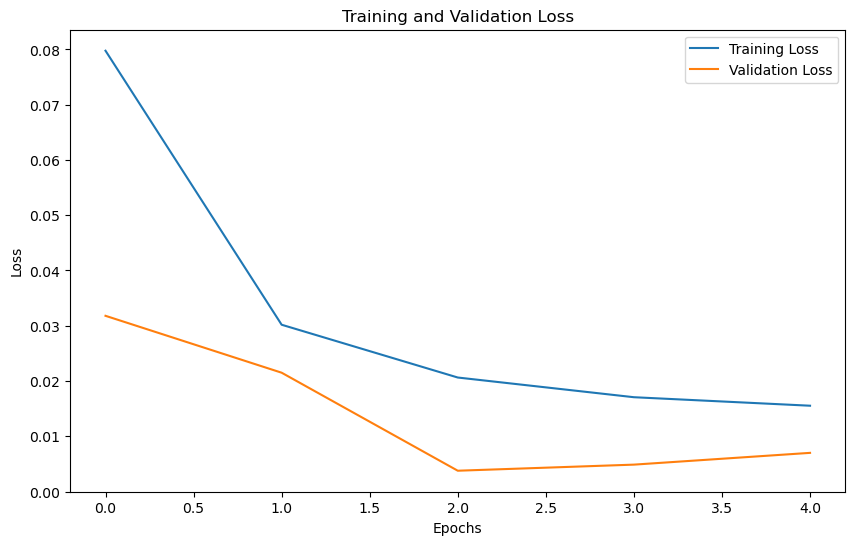

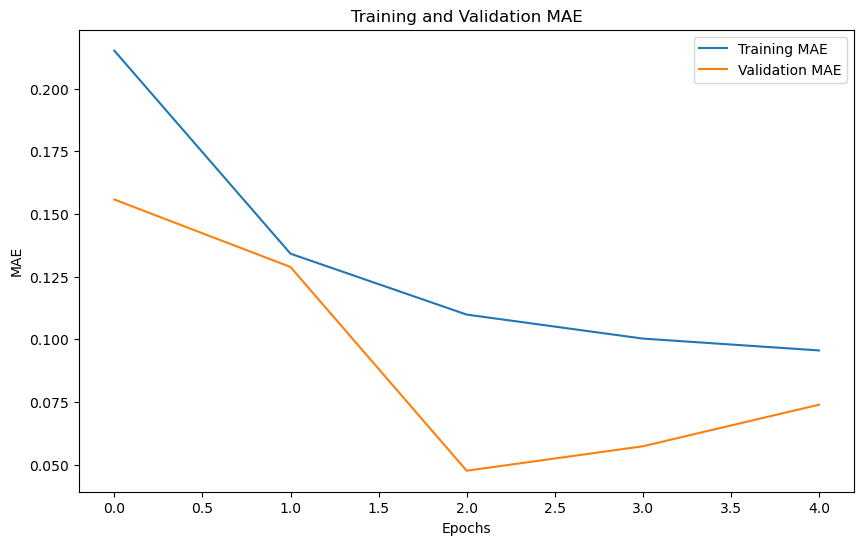

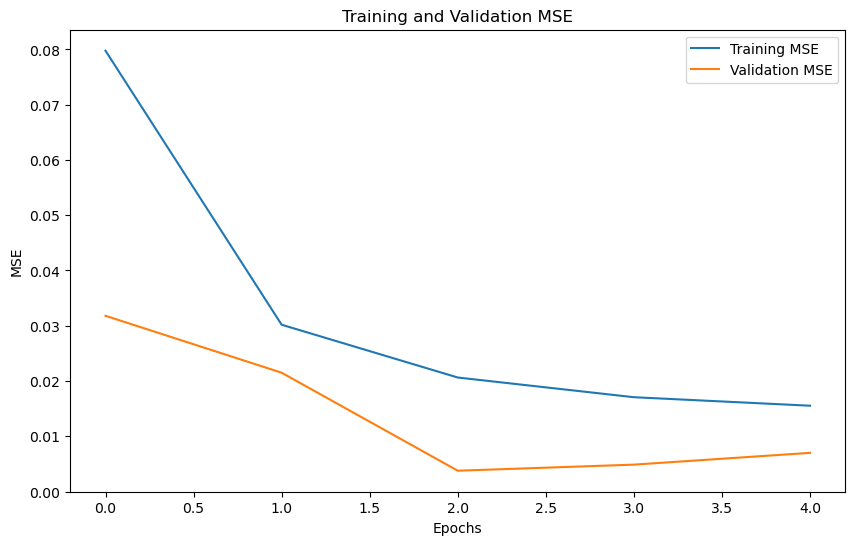

16/16 [==============================] - 0s 18ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_2_0/hyperparameter_random_tuning_fold_tf_2_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x580448c50>


Epoch 1/5
31/31 [==============================] - 8s 30ms/step - loss: 0.2554 - mean_absolute_error: 0.4552 - mean_squared_error: 0.2554 - val_loss: 0.1899 - val_mean_absolute_error: 0.3816 - val_mean_squared_error: 0.1899
Epoch 2/5
31/31 [==============================] - 0s 12ms/step - loss: 0.1712 - mean_absolute_error: 0.3596 - mean_squared_error: 0.1712 - val_loss: 0.1289 - val_mean_absolute_error: 0.3048 - val_mean_squared_error: 0.1289
Epoch 3/5
31/31 [==============================] - 0s 12ms/step - loss: 0.0825 - mean_absolute_error: 0.2269 - mean_squared_error: 0.0825 - val_loss: 0.0379 - val_mean_absolute_error: 0.1649 - val_mean_squared_error: 0.0379
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0475 - mean_absolute_error: 0.1712 - mean_squared_error: 0.0475 - val_loss: 0.0183 - val_mean_absolute_error: 0.1109 - val_mean_squared_error: 0.0183
Epoch 5/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.

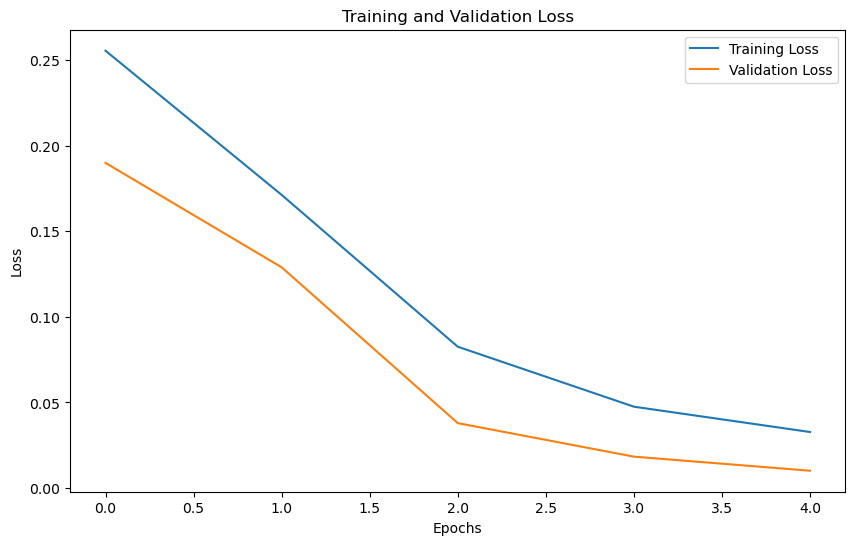

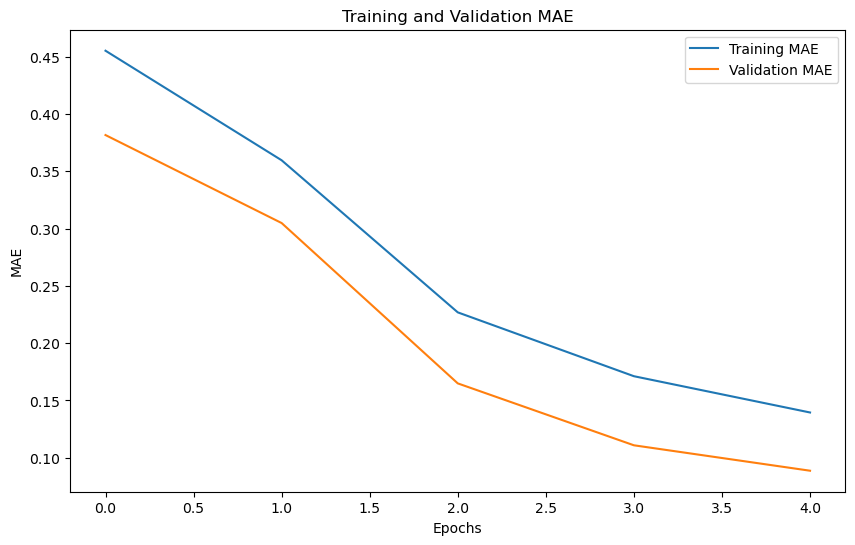

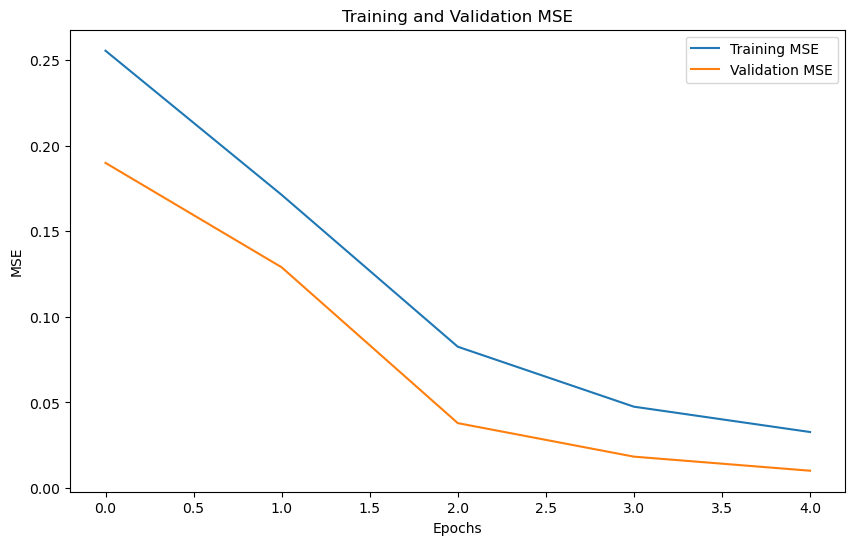

31/31 [==============================] - 1s 3ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_2_1/hyperparameter_random_tuning_fold_tf_2_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x583b18c50>


Epoch 1/5
31/31 [==============================] - 4s 22ms/step - loss: 0.0629 - mean_absolute_error: 0.1849 - mean_squared_error: 0.0629 - val_loss: 0.0042 - val_mean_absolute_error: 0.0507 - val_mean_squared_error: 0.0042
Epoch 2/5
31/31 [==============================] - 0s 12ms/step - loss: 0.0184 - mean_absolute_error: 0.1069 - mean_squared_error: 0.0184 - val_loss: 0.0058 - val_mean_absolute_error: 0.0507 - val_mean_squared_error: 0.0058
Epoch 3/5
31/31 [==============================] - 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0813 - mean_squared_error: 0.0112 - val_loss: 0.0019 - val_mean_absolute_error: 0.0334 - val_mean_squared_error: 0.0019
Epoch 4/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0700 - mean_squared_error: 0.0082 - val_loss: 0.0029 - val_mean_absolute_error: 0.0444 - val_mean_squared_error: 0.0029
Epoch 5/5
31/31 [==============================] - 1s 22ms/step - loss: 0.0070 - mean_absolute_error: 0.

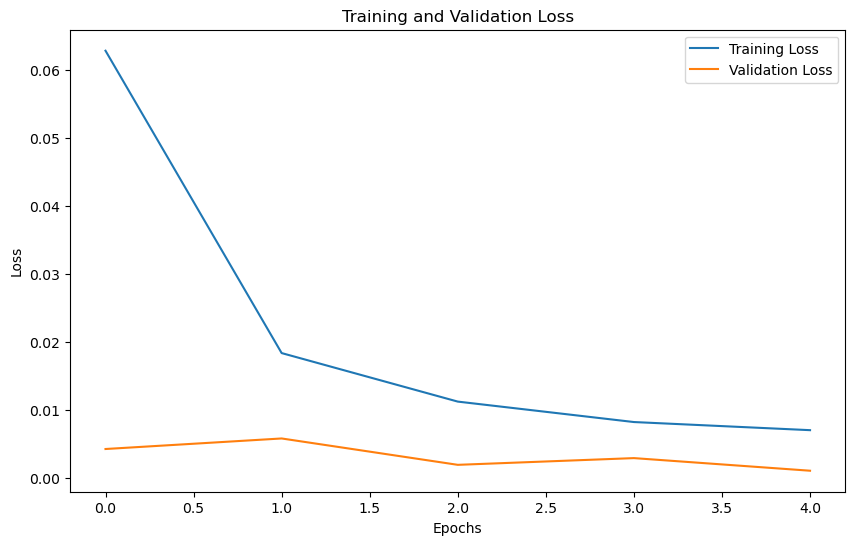

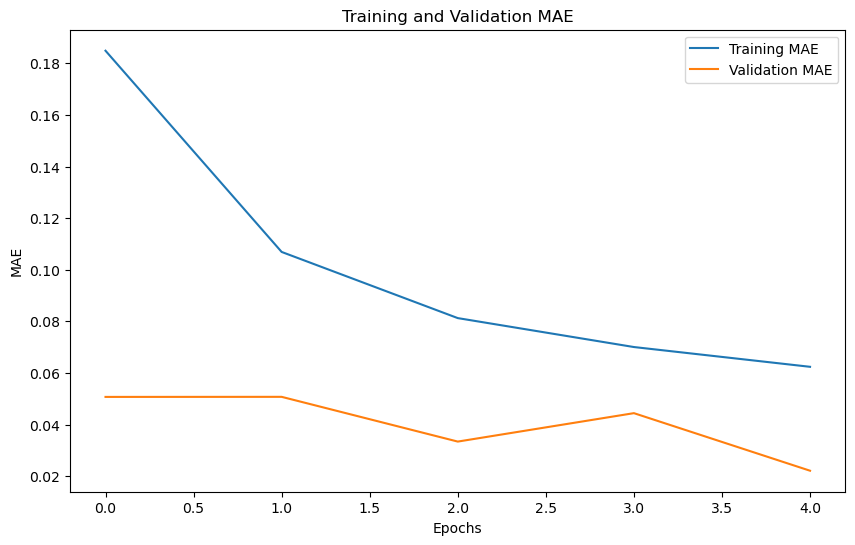

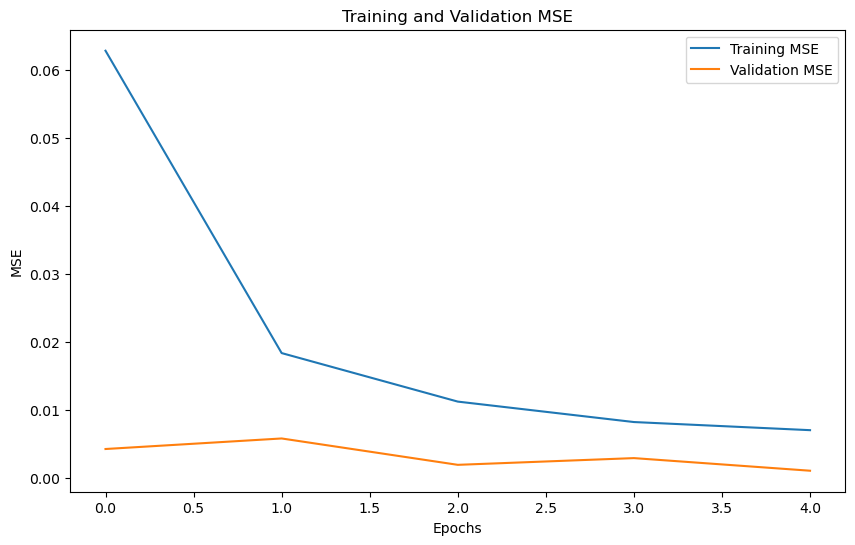

16/16 [==============================] - 0s 6ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_3_0/hyperparameter_random_tuning_fold_tf_3_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x589304850>


Epoch 1/5
31/31 [==============================] - 3s 35ms/step - loss: 0.0276 - mean_absolute_error: 0.1254 - mean_squared_error: 0.0276 - val_loss: 0.0274 - val_mean_absolute_error: 0.1498 - val_mean_squared_error: 0.0274
Epoch 2/5
31/31 [==============================] - 1s 38ms/step - loss: 0.0192 - mean_absolute_error: 0.1051 - mean_squared_error: 0.0192 - val_loss: 0.0141 - val_mean_absolute_error: 0.1102 - val_mean_squared_error: 0.0141
Epoch 3/5
31/31 [==============================] - 1s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0930 - mean_squared_error: 0.0147 - val_loss: 0.0103 - val_mean_absolute_error: 0.0848 - val_mean_squared_error: 0.0103
Epoch 4/5
31/31 [==============================] - 1s 31ms/step - loss: 0.0136 - mean_absolute_error: 0.0887 - mean_squared_error: 0.0136 - val_loss: 0.0164 - val_mean_absolute_error: 0.1121 - val_mean_squared_error: 0.0164
Epoch 5/5
31/31 [==============================] - 1s 37ms/step - loss: 0.0127 - mean_absolute_error: 0.

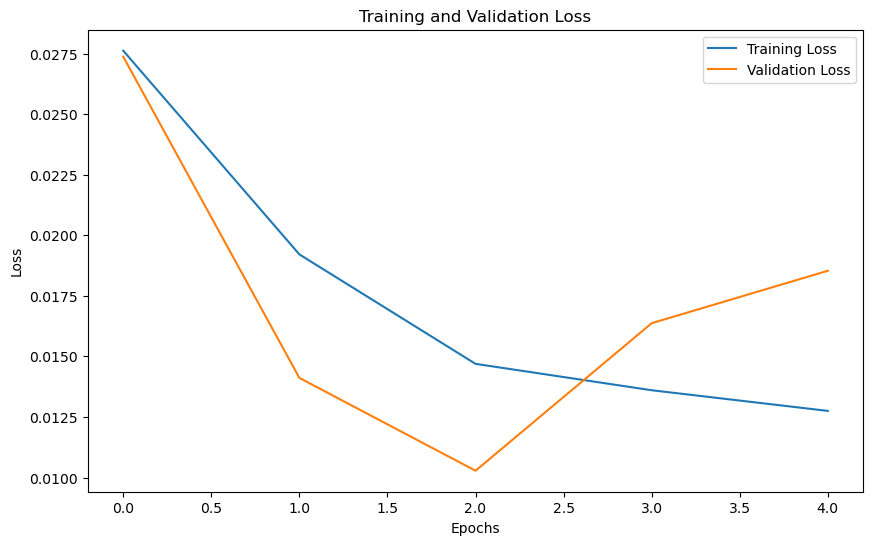

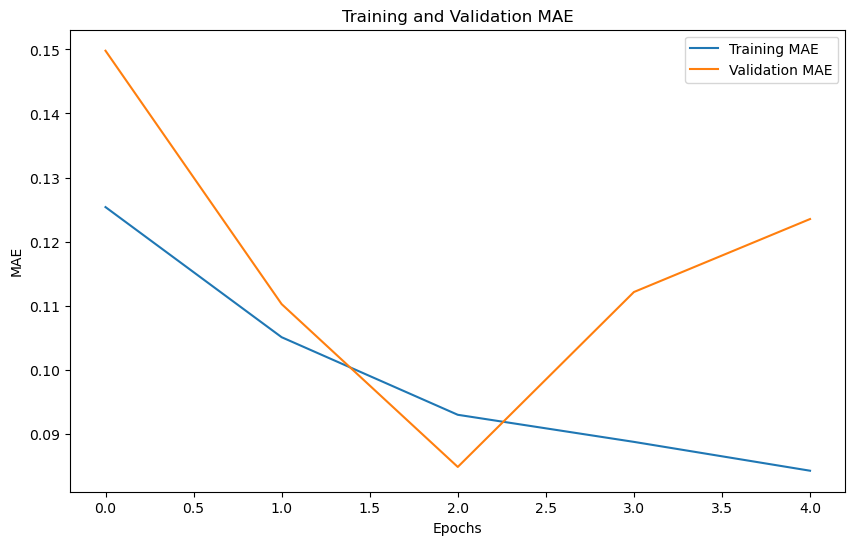

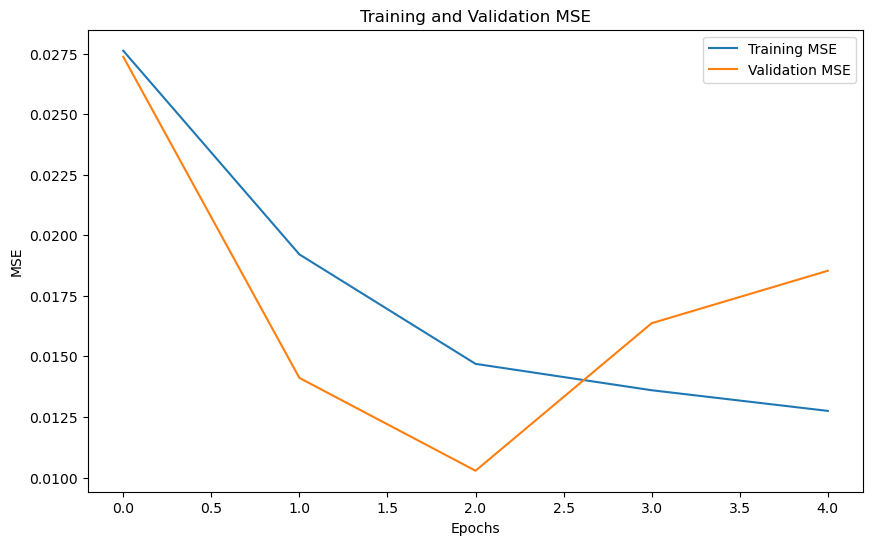

31/31 [==============================] - 1s 9ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_3_1/hyperparameter_random_tuning_fold_tf_3_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x303489ed0>


Epoch 1/5
31/31 [==============================] - 6s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.1697 - mean_squared_error: 0.0512 - val_loss: 0.0245 - val_mean_absolute_error: 0.1434 - val_mean_squared_error: 0.0245
Epoch 2/5
31/31 [==============================] - 1s 24ms/step - loss: 0.0222 - mean_absolute_error: 0.1151 - mean_squared_error: 0.0222 - val_loss: 0.0287 - val_mean_absolute_error: 0.1576 - val_mean_squared_error: 0.0287
Epoch 3/5
31/31 [==============================] - 1s 46ms/step - loss: 0.0194 - mean_absolute_error: 0.1064 - mean_squared_error: 0.0194 - val_loss: 0.0332 - val_mean_absolute_error: 0.1452 - val_mean_squared_error: 0.0332
Epoch 4/5
31/31 [==============================] - 1s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0794 - mean_squared_error: 0.0119 - val_loss: 0.0205 - val_mean_absolute_error: 0.1227 - val_mean_squared_error: 0.0205
Epoch 5/5
31/31 [==============================] - 1s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.

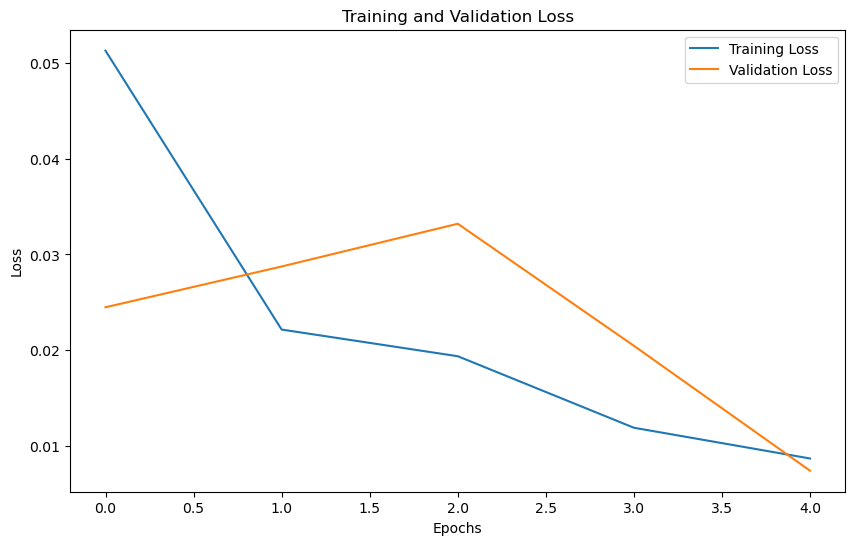

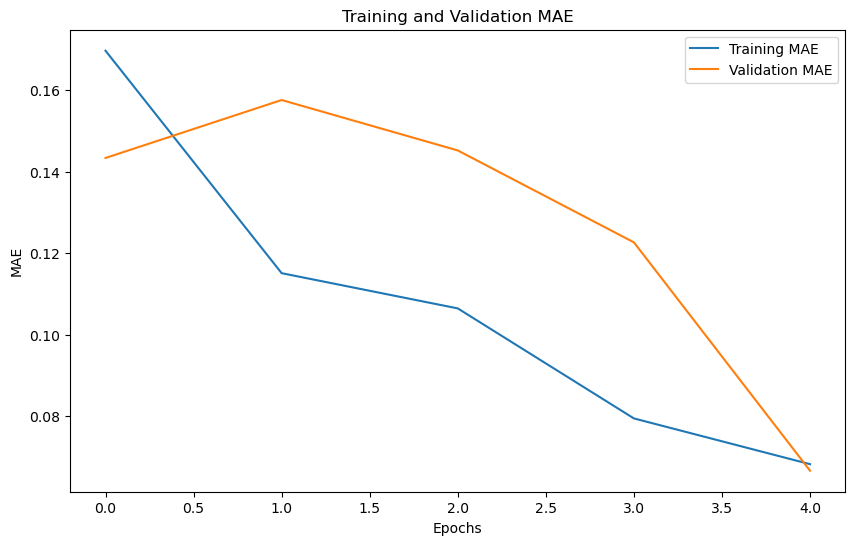

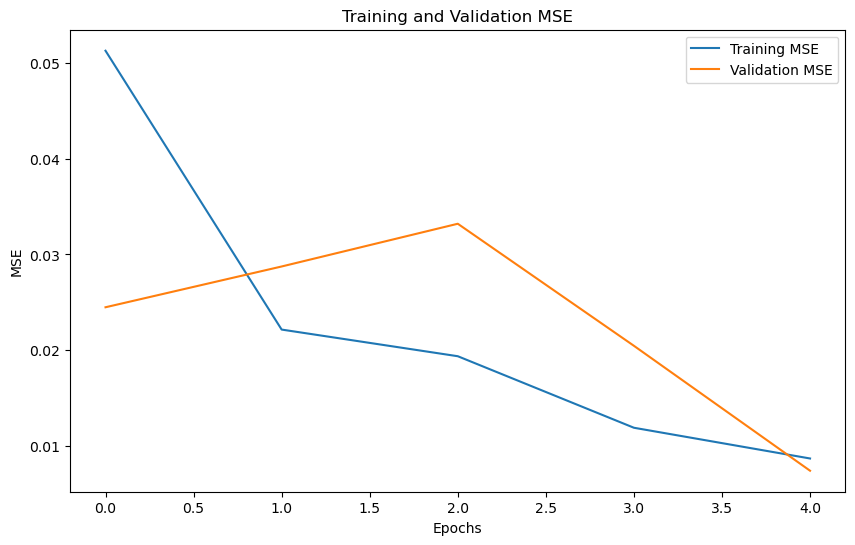

16/16 [==============================] - 0s 21ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_4_0/hyperparameter_random_tuning_fold_tf_4_0/tuner0.json
Best hyperparameters for fold 0: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x58e0d55d0>


Epoch 1/5
31/31 [==============================] - 4s 41ms/step - loss: 0.0492 - mean_absolute_error: 0.1655 - mean_squared_error: 0.0492 - val_loss: 0.0196 - val_mean_absolute_error: 0.1184 - val_mean_squared_error: 0.0196
Epoch 2/5
31/31 [==============================] - 1s 37ms/step - loss: 0.0242 - mean_absolute_error: 0.1180 - mean_squared_error: 0.0242 - val_loss: 0.0161 - val_mean_absolute_error: 0.1006 - val_mean_squared_error: 0.0161
Epoch 3/5
31/31 [==============================] - 1s 42ms/step - loss: 0.0185 - mean_absolute_error: 0.1022 - mean_squared_error: 0.0185 - val_loss: 0.0241 - val_mean_absolute_error: 0.1442 - val_mean_squared_error: 0.0241
Epoch 4/5
31/31 [==============================] - 1s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0844 - mean_squared_error: 0.0126 - val_loss: 0.0126 - val_mean_absolute_error: 0.1008 - val_mean_squared_error: 0.0126
Epoch 5/5
31/31 [==============================] - 1s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.

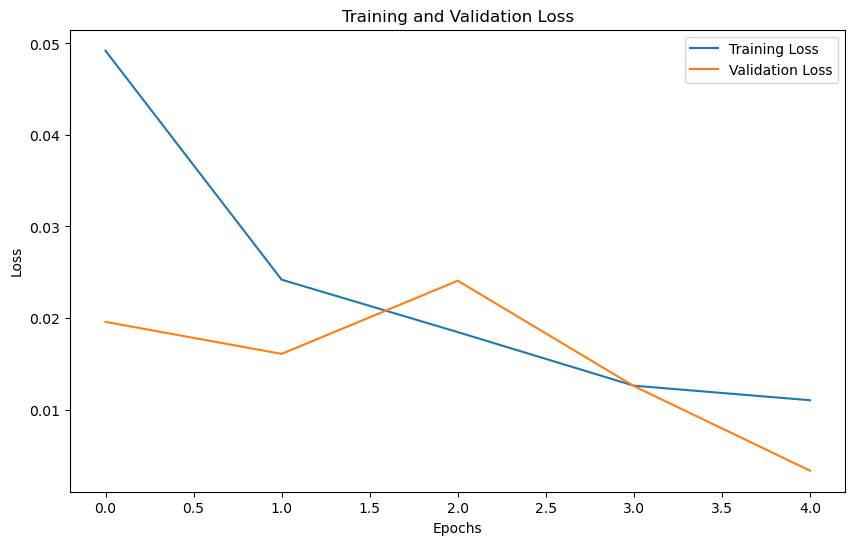

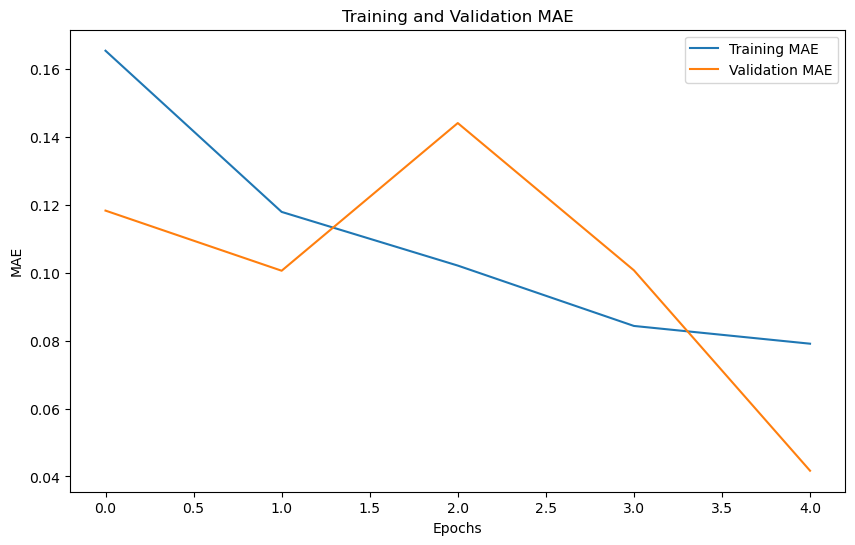

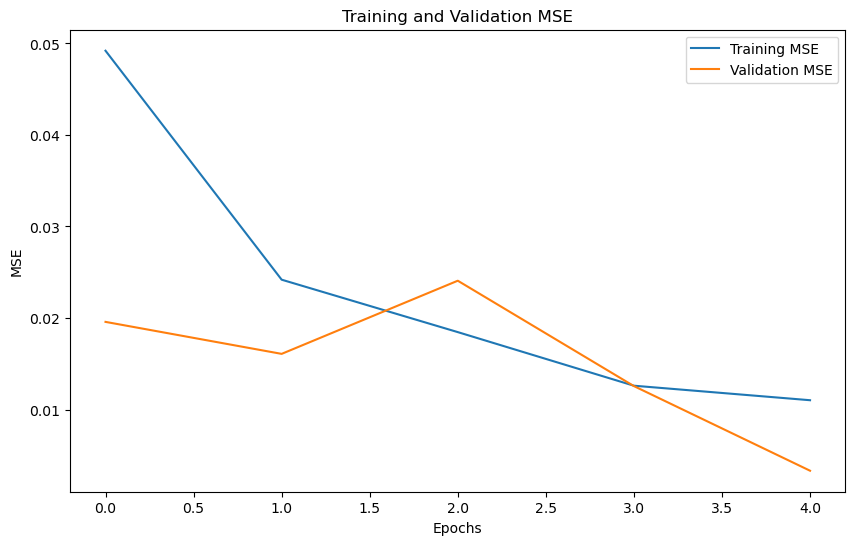

31/31 [==============================] - 0s 8ms/step
Reloading Tuner from ./keras_tuner_random_dir_fold_tf_4_1/hyperparameter_random_tuning_fold_tf_4_1/tuner0.json
Best hyperparameters for fold 1: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x58e30f8d0>


Epoch 1/5
31/31 [==============================] - 4s 34ms/step - loss: 0.0611 - mean_absolute_error: 0.1865 - mean_squared_error: 0.0611 - val_loss: 0.0237 - val_mean_absolute_error: 0.1321 - val_mean_squared_error: 0.0237
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.1193 - mean_squared_error: 0.0237 - val_loss: 0.0063 - val_mean_absolute_error: 0.0681 - val_mean_squared_error: 0.0063
Epoch 3/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.1008 - mean_squared_error: 0.0172 - val_loss: 0.0057 - val_mean_absolute_error: 0.0631 - val_mean_squared_error: 0.0057
Epoch 4/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0875 - mean_squared_error: 0.0131 - val_loss: 0.0034 - val_mean_absolute_error: 0.0477 - val_mean_squared_error: 0.0034
Epoch 5/5
31/31 [==============================] - 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.079

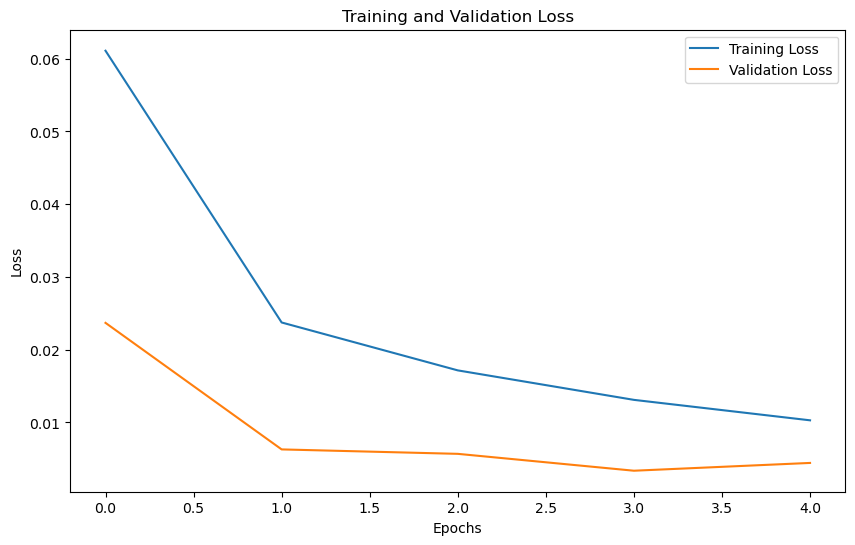

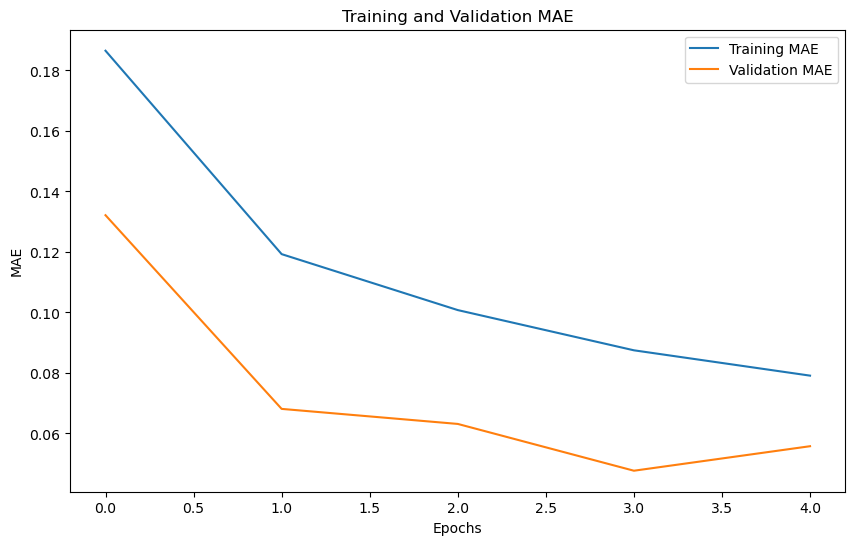

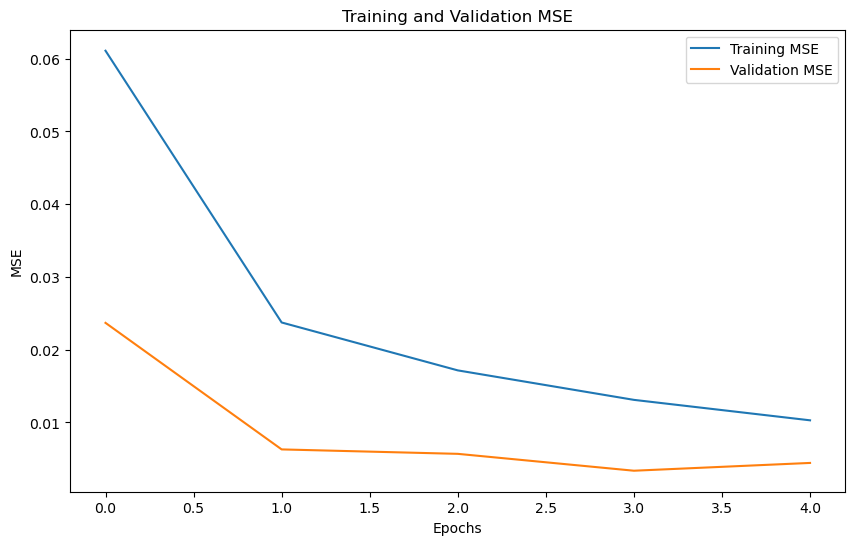

16/16 [==============================] - 0s 8ms/step


In [130]:
# for fold_outer_idx, (train_ix, test_ix) in enumerate(outer_cv.split(X)):
#     X_train_outer, X_test_outer = X[train_ix], X[test_ix]
#     y_train_outer, y_test_outer = y[train_ix], y[test_ix]

#     inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

#     for fold_idx, (train_ix_inner, val_ix) in enumerate(inner_cv.split(X_train_outer)):
#         X_train_inner, X_val = X_train_outer[train_ix_inner], X_train_outer[val_ix]
#         y_train_inner, y_val = y_train_outer[train_ix_inner], y_train_outer[val_ix]

#         tuner = kt.RandomSearch(
#             build_model,
#             objective='val_loss',
#             max_trials=3,
#             directory=f'./keras_tuner_random_dir_fold_tf_{fold_outer_idx}_{fold_idx}',
#             project_name=f'hyperparameter_random_tuning_fold_tf_{fold_outer_idx}_{fold_idx}'
#         )

#         tuner.search(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5)

#         best_hps = tuner.oracle.get_best_trials(1)[0].hyperparameters
#         print(f"Best hyperparameters for fold {fold_idx}: {best_hps}")

#         model = build_model(best_hps)
#         es = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

#         model.fit(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=es)

#         y_pred = model.predict(X_val)
#         mae = mean_squared_error(y_val, y_pred)

#         if mae < best_model_mae:
#             best_model_mae = mae
#             best_model_hyperparameters = best_hps
#             best_model = model

#         if mae > worst_model_mae:
#             worst_model_mae = mae
#             worst_model_hyperparameters = best_hps
#             worst_model = model

#     start_time = time.time()
#     y_pred_best = best_model.predict(X_test_outer)
#     y_pred_worst = worst_model.predict(X_test_outer)
#     end_time = time.time()

#     mse_best = mean_squared_error(y_test_outer, y_pred_best)
#     mae_best = mean_absolute_error(y_test_outer, y_pred_best)
#     rmse_best = np.sqrt(mse_best)
#     r2_best = r2_score(y_test_outer, y_pred_best)
#     time_duration = end_time - start_time

#     mse_worst = mean_squared_error(y_test_outer, y_pred_worst)
#     mae_worst = mean_absolute_error(y_test_outer, y_pred_worst)
#     rmse_worst = np.sqrt(mse_worst)
#     r2_worst = r2_score(y_test_outer, y_pred_worst)

#     nested_scores.append({
#         "Best Model": {
#             "MSE": mse_best,
#             "R^2": r2_best,
#             "RMSE": rmse_best,
#             "MAE": mae_best,
#             "testing time": time_duration
#         },
#         "Worst Model": {
#             "MSE": mse_worst,
#             "R^2": r2_worst,
#             "RMSE": rmse_worst,
#             "MAE": mae_worst
#         }
#     })

for fold_outer_idx, (train_ix, test_ix) in enumerate(outer_cv.split(X)):
    X_train_outer, X_test_outer = X[train_ix], X[test_ix]
    y_train_outer, y_test_outer = y[train_ix], y[test_ix]

    inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

    for fold_idx, (train_ix_inner, val_ix) in enumerate(inner_cv.split(X_train_outer)):
        X_train_inner, X_val = X_train_outer[train_ix_inner], X_train_outer[val_ix]
        y_train_inner, y_val = y_train_outer[train_ix_inner], y_train_outer[val_ix]

        tuner = kt.RandomSearch(
            build_tft_model,
            objective='val_loss',
            max_trials=3,
            directory=f'./keras_tuner_random_dir_fold_tf_{fold_outer_idx}_{fold_idx}',
            project_name=f'hyperparameter_random_tuning_fold_tf_{fold_outer_idx}_{fold_idx}'
        )

        tuner.search(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5)

        best_hps = tuner.oracle.get_best_trials(1)[0].hyperparameters
        print(f"Best hyperparameters for fold {fold_idx}: {best_hps}")

        model = build_tft_model(best_hps)
        es = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

        history=model.fit(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=es)
# Plotting training history
        plot_loss(history)
        plot_mae(history)
        plot_mse(history)

        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)

        if mae < best_model_mae:
            best_model_mae = mae
            best_model_hyperparameters = best_hps
            best_model = model

        if mae > worst_model_mae:
            worst_model_mae = mae
            worst_model_hyperparameters = best_hps
            worst_model = model

    start_time = time.time()
    y_pred_best = best_model.predict(X_test_outer)
    y_pred_worst = worst_model.predict(X_test_outer)
    end_time = time.time()

    mse_best = mean_squared_error(y_test_outer, y_pred_best)
    mae_best = mean_absolute_error(y_test_outer, y_pred_best)
    rmse_best = np.sqrt(mse_best)
    r2_best = r2_score(y_test_outer, y_pred_best)
    time_duration = end_time - start_time

    mse_worst = mean_squared_error(y_test_outer, y_pred_worst)
    mae_worst = mean_absolute_error(y_test_outer, y_pred_worst)
    rmse_worst = np.sqrt(mse_worst)
    r2_worst = r2_score(y_test_outer, y_pred_worst)

    nested_scores.append({
        "Best Model": {
            "MSE": mse_best,
            "R^2": r2_best,
            "RMSE": rmse_best,
            "MAE": mae_best,
            "testing time": time_duration
        },
        "Worst Model": {
            "MSE": mse_worst,
            "R^2": r2_worst,
            "RMSE": rmse_worst,
            "MAE": mae_worst
        }
    })




# for fold_outer_idx, (train_ix, test_ix) in enumerate(outer_cv.split(X)):
#     X_train_outer, X_test_outer = X[train_ix], X[test_ix]
#     y_train_outer, y_test_outer = y[train_ix], y[test_ix]

#     inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

#     for fold_idx, (train_ix_inner, val_ix) in enumerate(inner_cv.split(X_train_outer)):
#         X_train_inner, X_val = X_train_outer[train_ix_inner], X_train_outer[val_ix]
#         y_train_inner, y_val = y_train_outer[train_ix_inner], y_train_outer[val_ix]

#         tuner = kt.RandomSearch(
#             build_model,
#             objective='val_loss',
#             max_trials=3,
#             directory=f'./keras_tuner_random_dir_fold_tf_{fold_outer_idx}_{fold_idx}',
#             project_name=f'hyperparameter_random_tuning_fold_tf_{fold_outer_idx}_{fold_idx}'
#         )

#         tuner.search(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5)

#         best_hps = tuner.oracle.get_best_trials(1)[0].hyperparameters
#         print(f"Best hyperparameters for fold {fold_idx}: {best_hps}")

#         model = build_model(best_hps)
#         es = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

#         history = model.fit(X_train_inner, y_train_inner, validation_data=(X_val, y_val), epochs=5, batch_size=32, callbacks=es)

#         # Plotting training history
#         plot_loss(history)
#         plot_mae(history)
#         plot_mse(history)

#         y_pred = model.predict(X_val)
#         mae = mean_squared_error(y_val, y_pred)

#         if mae < best_model_mae:
#             best_model_mae = mae
#             best_model_hyperparameters = best_hps
#             best_model = model

#         if mae > worst_model_mae:
#             worst_model_mae = mae
#             worst_model_hyperparameters = best_hps
#             worst_model = model

#     start_time = time.time()
#     y_pred_best = best_model.predict(X_test_outer)
#     y_pred_worst = worst_model.predict(X_test_outer)
#     end_time = time.time()

#     mse_best = mean_squared_error(y_test_outer, y_pred_best)
#     mae_best = mean_absolute_error(y_test_outer, y_pred_best)
#     rmse_best = np.sqrt(mse_best)
#     r2_best = r2_score(y_test_outer, y_pred_best)
#     time_duration = end_time - start_time

#     mse_worst = mean_squared_error(y_test_outer, y_pred_worst)
#     mae_worst = mean_absolute_error(y_test_outer, y_pred_worst)
#     rmse_worst = np.sqrt(mse_worst)
#     r2_worst = r2_score(y_test_outer, y_pred_worst)

#     nested_scores.append({
#         "Best Model": {
#             "MSE": mse_best,
#             "R^2": r2_best,
#             "RMSE": rmse_best,
#             "MAE": mae_best,
#             "testing time": time_duration
#         },
#         "Worst Model": {
#             "MSE": mse_worst,
#             "R^2": r2_worst,
#             "RMSE": rmse_worst,
#             "MAE": mae_worst
#         }
#     })


In [131]:
print("Nested CV scores:", nested_scores)

Nested CV scores: [{'Best Model': {'MSE': 0.0030434362736252926, 'R^2': 0.9292789221173525, 'RMSE': 0.05516734789370695, 'MAE': 0.04365834435216828, 'testing time': 0.7585668563842773}, 'Worst Model': {'MSE': 0.004427412452822376, 'R^2': 0.8971191269526135, 'RMSE': 0.06653880411325692, 'MAE': 0.057214152927630456}}, {'Best Model': {'MSE': 0.0025837150468734304, 'R^2': 0.9385863664249595, 'RMSE': 0.05083025719857642, 'MAE': 0.0411735882281472, 'testing time': 0.7346668243408203}, 'Worst Model': {'MSE': 0.004363054364730894, 'R^2': 0.8962923475838354, 'RMSE': 0.06605342053770488, 'MAE': 0.05751926634009407}}, {'Best Model': {'MSE': 0.001909284843839508, 'R^2': 0.9573385837153776, 'RMSE': 0.043695364100090846, 'MAE': 0.03314393231395753, 'testing time': 0.3687722682952881}, 'Worst Model': {'MSE': 0.010045542181148944, 'R^2': 0.775540533840454, 'RMSE': 0.1002274522331529, 'MAE': 0.08608279557372271}}, {'Best Model': {'MSE': 0.0019054435675963754, 'R^2': 0.9537491279582156, 'RMSE': 0.043651

In [132]:
print("Nested Cross-Validation Scores:")
for idx, score in enumerate(nested_scores):
    print(f"Fold {idx+1}:")
    print(f"  Best Model - MSE: {score['Best Model']['MSE']}, R^2: {score['Best Model']['R^2']}, RMSE: {score['Best Model']['RMSE']}, MAE: {score['Best Model']['MAE']}, Testing Time: {score['Best Model']['testing time']}")
    print(f"  Worst Model - MSE: {score['Worst Model']['MSE']}, R^2: {score['Worst Model']['R^2']}, RMSE: {score['Worst Model']['RMSE']}, MAE: {score['Worst Model']['MAE']}")


Nested Cross-Validation Scores:
Fold 1:
  Best Model - MSE: 0.0030434362736252926, R^2: 0.9292789221173525, RMSE: 0.05516734789370695, MAE: 0.04365834435216828, Testing Time: 0.7585668563842773
  Worst Model - MSE: 0.004427412452822376, R^2: 0.8971191269526135, RMSE: 0.06653880411325692, MAE: 0.057214152927630456
Fold 2:
  Best Model - MSE: 0.0025837150468734304, R^2: 0.9385863664249595, RMSE: 0.05083025719857642, MAE: 0.0411735882281472, Testing Time: 0.7346668243408203
  Worst Model - MSE: 0.004363054364730894, R^2: 0.8962923475838354, RMSE: 0.06605342053770488, MAE: 0.05751926634009407
Fold 3:
  Best Model - MSE: 0.001909284843839508, R^2: 0.9573385837153776, RMSE: 0.043695364100090846, MAE: 0.03314393231395753, Testing Time: 0.3687722682952881
  Worst Model - MSE: 0.010045542181148944, R^2: 0.775540533840454, RMSE: 0.1002274522331529, MAE: 0.08608279557372271
Fold 4:
  Best Model - MSE: 0.0019054435675963754, R^2: 0.9537491279582156, RMSE: 0.04365138677747106, MAE: 0.03413510949642

78/78 [==============================] - 1s 6ms/step


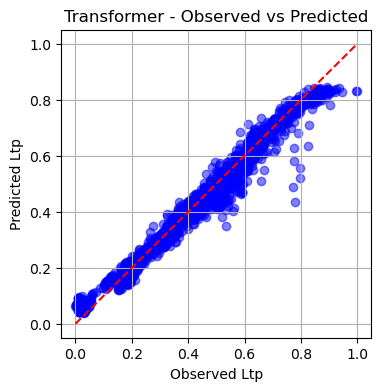

In [133]:

import matplotlib.pyplot as plt

# Predict using the best model
y_pred = best_model.predict(X).flatten()
y_observed = y.flatten()

# Plotting
plt.figure(figsize=(4,4))
plt.scatter(y_observed, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_observed), max(y_observed)], [min(y_observed), max(y_observed)], color='red', linestyle='--')
plt.title('Transformer - Observed vs Predicted')
plt.xlabel('Observed Ltp')
plt.ylabel('Predicted Ltp')
plt.grid(True)
plt.show()

In [134]:
# Assuming best_model is your trained model
optimizer = best_model.optimizer
learning_rate = float(optimizer.learning_rate.numpy())

# Print the optimizer and learning rate
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", learning_rate)

Optimizer: Adam
Learning Rate: 0.004518796689808369


In [135]:
# Function to extract dropout rate from a layer
def get_dropout_rate(layer):
    if hasattr(layer, 'rate'):
        return layer.rate
    elif hasattr(layer, 'dropout'):
        return layer.dropout
    else:
        return None

# Iterate through layers of the model and find the dropout rates
dropout_rates = []

for layer in best_model.layers:
    rate = get_dropout_rate(layer)
    if rate is not None:
        dropout_rates.append((layer.name, rate))

# Print the dropout rates
print("Dropout Rates:")
for layer_name, rate in dropout_rates:
    print(f"{layer_name}: {rate}")


Dropout Rates:
dropout_89: 0.22416132576350759
dropout_90: 0.22416132576350759
dropout_91: 0.16152401332194163
dropout_92: 0.16152401332194163
dropout_93: 0.1
dropout_94: 0.1
dropout_95: 0.1
dropout_96: 0.1
dropout_97: 0.21304533422492086


In [136]:
best_hyperparameters_dict = best_model_hyperparameters.values
worst_hyperparameters_dict = worst_model_hyperparameters.values

print("Best Hyperparameters:", best_hyperparameters_dict)
print("Worst Hyperparameters:", worst_hyperparameters_dict)

Best Hyperparameters: {'num_transformer_blocks': 4, 'head_size': 168, 'num_heads': 2, 'ff_dim': 23, 'dropout_0': 0.22416132576350759, 'dropout_1': 0.16152401332194163, 'num_mlp_layers': 1, 'mlp_units_0': 64, 'mlp_dropout_0': 0.21304533422492086, 'optimizer': 'adamax', 'learning_rate': 0.004518796713876706, 'dropout_2': 0.1, 'dropout_3': 0.1}
Worst Hyperparameters: {'num_transformer_blocks': 2, 'head_size': 168, 'num_heads': 14, 'ff_dim': 54, 'dropout_0': 0.27241497193935316, 'dropout_1': 0.253621605785467, 'num_mlp_layers': 3, 'mlp_units_0': 96, 'mlp_dropout_0': 0.23880413312758317, 'optimizer': 'adam', 'learning_rate': 0.0004375483868870473, 'mlp_units_1': 96, 'mlp_dropout_1': 0.2854904096858877, 'mlp_units_2': 32, 'mlp_dropout_2': 0.196560111989506}


In [137]:
# Assuming best_model is your final trained model
best_model.save('./STOCK_best_model_transformer.h5')

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


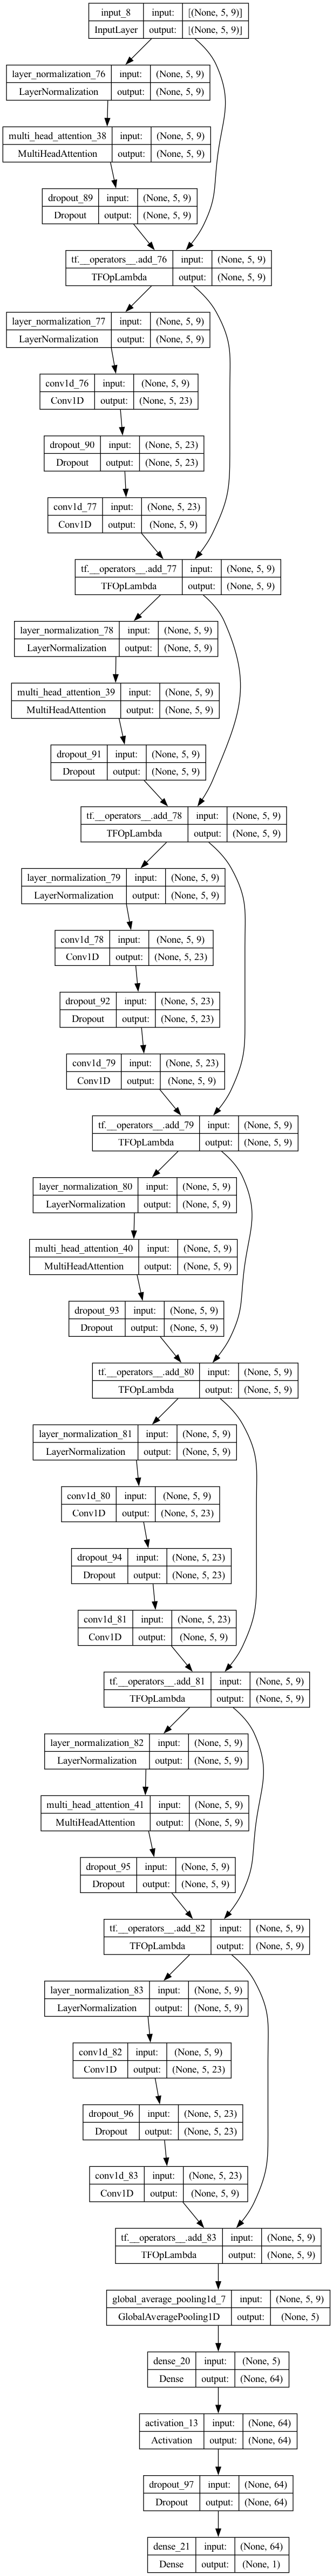

In [138]:
from keras.utils import plot_model

# Visualize the model architecture and save the diagram to a file
plot_model(best_model, to_file='tf_model.png', show_shapes=True, show_layer_names=True)
